# OSMI Mental Health in Tech (2016, ongoing)

## Context

* Mental Health (MH) has been an increasingly prominent topic in recent years.
* According to the Singapore Association for Mental Health (SAMH), a mental illess "...is a disturbance of the mind that impairs the way we think, feel and behave. It affects our daily activities, as well as impact the lives of family members and friends."
* SAMH states that 1 in 7 Singaporeans have experienced a mood or anixety disorder (which are common mental illnesses).
* SAMH also states that "Despite their prevalence, persons with mental illness still face considerable stigma and discrimination. Many such individuals are thus reluctant to seek help and treatment."
* It is supposed to be beneficial for people suffering from mental illness to firstly recognise it, and secondly, to seek help for it.
* Tech companies are anecdotally notorious for endless and high-stress work environment.
* As a tech student, I'm personally interested to find out the prevalent attitudes regarding MH in the tech workplace.
* I am also interested to identify what company features are most critical in inclining employees towards recognising their Mental Health Disorders (MHD) and seeking help for it.

## Objectives
1. Explore the data provided in survey for insights into Mental Health.
2. Attempt to build Classifiers to predict whether an employee:
    1. will be willing to raise MH issues with future employers
    2. will seek professional diagnosis for MHD
    3. will seek treatment for MHD

SAMH: https://www.samhealth.org.sg/understanding-mental-health/what-is-mental-illness/

### Datasets required:
* `mental-heath-in-tech-2016_20161114.csv` from [Kaggle (OSMI Mental Health in Tech Survey 2016)](https://www.kaggle.com/osmi/mental-health-in-tech-2016)

### Outline
1. Preview Data
2. Data Cleaning
    1. Filter out self-employed
    2. Drop empty or irrelevant columns
    3. Preview Column Values & General Pre-Process
    4. Employer Type & Role
    5. Age
    6. Gender
    7. Country of Employment
    8. Work Position
    9. Mass Rename Columns
3. Data Visualisations
    1. Mental Health Status across Ages and Genders
    2. Mental Health Disorders (MHD)
    3. Mental Health Status and Company Size
    4. Correlation Matrix of Features  
4. Classifiers
    1. RFC: Openness about MH with Future Employer (acc: 93%)
    2. RFC: Seeking Professional Diagnosis (acc: 90+%)
    3. RFC: Seeking Treatment (acc: 90+%)
5. Credits
    1. Data Visualisation Python Seaborn kernel [https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn]
    2. Preprocessing and Random Forest with 87% accuracy kernel [https://www.kaggle.com/h1rshit/preprocessing-and-random-forest-with-87-accuracy]

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 64) #63 columns in original data
sns.set()

dim = (16,8)
fs=16

## 1. Preview Data

* There are 63 features (survey questions) and a total of 1433 respondents.
* There are many nan values, which appear to be associated with a respondent being self-employed (see row idx 3).
* Respondents who are self-employed will be dropped from this study.
* 

In [2]:
import os
csv_file = 'mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(csv_file)
df.shape

(1433, 63)

In [3]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [4]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.00,1146.00,263.00,287.00,1433.00,1433.00,1433.00
mean,0.20,0.77,0.94,0.64,0.88,0.59,34.29
std,0.40,0.42,0.23,0.48,0.32,0.49,11.29
min,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,0.00,1.00,1.00,0.00,1.00,0.00,28.00
50%,0.00,1.00,1.00,1.00,1.00,1.00,33.00
75%,0.00,1.00,1.00,1.00,1.00,1.00,39.00
max,1.00,1.00,1.00,1.00,1.00,1.00,323.00


In [5]:
df.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another indivi

## 2. Data Cleaning

### 2.A Filter out self-employed

In [6]:
df["Are you self-employed?"].value_counts()
# there are 287 self-employed and 1146 employed respondents.

0    1146
1     287
Name: Are you self-employed?, dtype: int64

In [7]:
# drop self-employed respondents
df2 = df.copy()
df2 = df2[df2["Are you self-employed?"]==0]
df2.shape 

(1146, 63)

In [8]:
# relook df2
df2.head()
# notice several columns with many nan values - may need to drop.

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [9]:
df2.describe()
# notice that col
# "Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?"
# is completely empty and will be dropped

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1146.00,1146.00,263.00,0.00,1146.00,1146.00,1146.00
mean,0.00,0.77,0.94,NaN,0.89,0.57,33.66
std,0.00,0.42,0.23,NaN,0.32,0.49,11.70
min,0.00,0.00,0.00,NaN,0.00,0.00,3.00
25%,0.00,1.00,1.00,NaN,1.00,0.00,28.00
50%,0.00,1.00,1.00,NaN,1.00,1.00,32.00
75%,0.00,1.00,1.00,NaN,1.00,1.00,38.00
max,0.00,1.00,1.00,NaN,1.00,1.00,323.00


In [10]:
df2.describe(include=['O'])
# some columns are completely empty and will be dropped
# some columns are irrelevant and will be dropped

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another indivi

### 2.B Drop empty or irrelevant columns

In [11]:
def col_ls(df):
    '''
    Prints out column names of df and its column index
    for ease of reading.
    
    Also returns a list of column names.'''
    ls = []
    for i, c in enumerate(df.columns):
        print(i, c)
        ls.append(c)
    return ls


In [12]:
df2_col = col_ls(df2)

0 Are you self-employed?
1 How many employees does your company or organization have?
2 Is your employer primarily a tech company/organization?
3 Is your primary role within your company related to tech/IT?
4 Does your employer provide mental health benefits as part of healthcare coverage?
5 Do you know the options for mental health care available under your employer-provided coverage?
6 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
10 Do you think that discussing a mental health disorder with your employer would have negative consequences?

In [13]:
empty_col = [
            "Do you know local or online resources to seek help for a mental health disorder?",
            "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",
            "If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",
            "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",
            "If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",
            "Do you believe your productivity is ever affected by a mental health issue?",
            "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"]
empty_col += [df2_col[16]]
irre_col = ["Are you self-employed?",
            "What US state or territory do you work in?",
           "What US state or territory do you live in?",
           "What country do you live in?",
           "Why or why not?",
           "Why or why not?.1"]
df3 = df2.copy()
df3 = df3.drop(empty_col+irre_col,axis=1)

In [14]:
df3_col = col_ls(df3)

0 How many employees does your company or organization have?
1 Is your employer primarily a tech company/organization?
2 Is your primary role within your company related to tech/IT?
3 Does your employer provide mental health benefits as part of healthcare coverage?
4 Do you know the options for mental health care available under your employer-provided coverage?
5 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
6 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
7 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
8 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
9 Do you think that discussing a mental health disorder with your employer would have negative consequences?
10 Do you think that disc

In [15]:
df3.describe()

,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1146.00,263.00,1146.00,1146.00,1146.00
mean,0.77,0.94,0.89,0.57,33.66
std,0.42,0.23,0.32,0.49,11.70
min,0.00,0.00,0.00,0.00,3.00
25%,1.00,1.00,1.00,0.00,28.00
50%,1.00,1.00,1.00,1.00,32.00
75%,1.00,1.00,1.00,1.00,38.00
max,1.00,1.00,1.00,1.00,323.00


In [16]:
df3.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you work in?,Which of th

### 2.C Preview Column Values & General Pre-Process
* Replace category responses with numeric labels.
    * The more affirmative the response is (wrt qn), closer to 1.
    * Otherwise, in decreasing order of affirmation, larger integer.
    * Non-Applicable & nan responses will be marked -1.
    * -1 responses will be dropped from data visualisations, if relevant.
* Identify weird columns to drop.
    * Such as columns with many missing & unaccounted responses.
* Identify potential target columns.
* Identify columns that require special attention to process.

In [17]:
def val(df):
    '''
    Prints out columns, its unique values and value counts,
    as well as null value count.
    To aid in data cleaning.'''
    for i, c in enumerate(df.columns):
        print(i,c)
        print()
        unique = df[c].unique()
        if len(unique) > 10:
            print("### More than 10 unique values. ###")
            print('### Special attention required for col\n{} {}\n###'.format(i,c))
            print()
        else:
            print(unique)
            print()
            print(df[c].value_counts())
            vc = df[c].value_counts().sum()
            print()
            print("Value count: ",vc)
        nc = df[c].isna().sum()
        print("Null value count: ",nc)
        print("Null %: {:.2f}%".format(100*nc/(nc+vc)))            
        print()

In [18]:
# preview columns, values, counts, etc
# identify columns that require special attention
# i.e. more than 10 unique values
val(df3)

0 How many employees does your company or organization have?

['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: How many employees does your company or organization have?, dtype: int64

Value count:  1146
Null value count:  0
Null %: 0.00%

1 Is your employer primarily a tech company/organization?

[1. 0.]

1.00    883
0.00    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

Value count:  1146
Null value count:  0
Null %: 0.00%

2 Is your primary role within your company related to tech/IT?

[nan  1.  0.]

1.00    248
0.00     15
Name: Is your primary role within your company related to tech/IT?, dtype: int64

Value count:  263
Null value count:  883
Null %: 77.05%

3 Does your employer provide mental health benefits as part of healthcare coverage?

['Not eligible for coverage / N/A' 'No' 'Yes' "I don't kn


Value count:  1146
Null value count:  0
Null %: 0.00%

36 Do you currently have a mental health disorder?

['No' 'Yes' 'Maybe']

Yes      451
No       441
Maybe    254
Name: Do you currently have a mental health disorder?, dtype: int64

Value count:  1146
Null value count:  0
Null %: 0.00%

37 If yes, what condition(s) have you been diagnosed with?

### More than 10 unique values. ###
### Special attention required for col
37 If yes, what condition(s) have you been diagnosed with?
###

Null value count:  701
Null %: 37.95%

38 If maybe, what condition(s) do you believe you have?

### More than 10 unique values. ###
### Special attention required for col
38 If maybe, what condition(s) do you believe you have?
###

Null value count:  896
Null %: 43.88%

39 Have you been diagnosed with a mental health condition by a medical professional?

['Yes' 'No']

No     579
Yes    567
Name: Have you been diagnosed with a mental health condition by a medical professional?, dtype: int64

Value count:

In [19]:
df3

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that i

In [20]:
df4 = df3.copy()

###
rp_col = "How many employees does your company or organization have?"
# fill na
# df4[cdf4[rp_col]] = df4[cdf4[rp_col]].fillna(-1)
# replace labels with
rp_dt = {'1-5':1,
        '6-25':6,
        '26-100':26,
        '100-500':101,
        '500-1000':501,
        'More than 1000':1001}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Is your primary role within your company related to tech/IT?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA

rp_col = "Does your employer provide mental health benefits as part of healthcare coverage?"
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        'Not eligible for coverage / N/A':-1
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you know the options for mental health care available under your employer-provided coverage?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'I am not sure':2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Does your employer offer resources to learn more about mental health concerns and options for seeking help?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {"Very easy":1, # positive/yes response to qn will be 1
        "Somewhat easy":2, # responses in increasing negativity will be 2 onwards
        "Neither easy nor difficult":3,
         "I don't know":3,
         "Somewhat difficult":4,
         "Very difficult":5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a mental health disorder with your employer would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a physical health issue with your employer would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you feel comfortable discussing a mental health disorder with your coworkers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you feel that your employer takes mental health as seriously as physical health?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'No':2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you have previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {0:2 # replace 0 (no) with 2 for consistency
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have your previous employers provided mental health benefits?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'No, none did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Were you aware of the options for mental health care provided by your previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, I was aware of all of them':1, # positive/yes response to qn will be 1
        'I was aware of some':2, # responses in increasing negativity will be 2 onwards,
        'No, I only became aware later':3,
         'N/A (not currently aware)':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did your previous employers provide resources to learn more about mental health issues and how to seek help?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, always':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'No':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a mental health disorder with previous employers would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None of them':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a physical health issue with previous employers would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
         'None of them':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you have been willing to discuss a mental health issue with your previous co-workers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, at all of my previous employers':1, # positive/yes response to qn will be 1
        'Some of my previous employers':2, # responses in increasing negativity will be 2 onwards,
         'No, at none of my previous employers':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, at all of my previous employers':1, # positive/yes response to qn will be 1
        'Some of my previous employers':2, # responses in increasing negativity will be 2 onwards,
         "I don't know":3,
         'No, at none of my previous employers':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did you feel that your previous employers took mental health as seriously as physical health?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
         'None of them':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you be willing to bring up a physical health issue with a potential employer in an interview?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you bring up a mental health issue with a potential employer in an interview?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you feel that being identified as a person with a mental health issue would hurt your career?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, it has':1, # positive/yes response to qn will be 1
        'Yes, I think it would':2, # responses in increasing negativity will be 2 onwards,
        'Maybe':3,
         "No, I don't think it would":4,
         'No, it has not':5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they do':1, # positive/yes response to qn will be 1
         'Yes, I think they would':2, # responses in increasing negativity will be 2 onwards,
        'Maybe':3,
         "No, I don't think they would":4,
         'No, they do not':5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "How willing would you be to share with friends and family that you have a mental illness?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Very open':1, # positive/yes response to qn will be 1
         'Somewhat open':2, # responses in increasing negativity will be 2 onwards,
        'Neutral':3,
         'Somewhat not open':4,
         'Not open at all':5,
         'Not applicable to me (I do not have a mental illness)':-1
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, I experienced':1, # positive/yes response to qn will be 1
         'Yes, I observed':2, # responses in increasing negativity will be 2 onwards,
        'Maybe/Not sure':3,
         'No':4,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
# nan values is 55.41%; unsure what is the cause of nan values
# drop column
df4 = df4.drop([rp_col],axis=1)

###
rp_col = "Do you have a family history of mental illness?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you had a mental health disorder in the past?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you currently have a mental health disorder?"
# potential target column or key X column
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you been diagnosed with a mental health condition by a medical professional?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'No':2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you ever sought treatment for a mental health issue from a mental health professional?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {1:1, # positive/yes response to qn will be 1
        0:2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Often':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Often':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you work remotely?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Always':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Never':3,
       }

df4[rp_col] = df4[rp_col].replace(rp_dt)

#####
df4.describe(include='all')

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively

### 2.D Employer Type & Role

In [21]:
df4["Is your employer primarily a tech company/organization?"].value_counts()
# employer of 263 respondents is not primarily tech
# there are 883 respondents whose employers are primarily tech

1.00    883
0.00    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [22]:
df4["Is your primary role within your company related to tech/IT?"].value_counts()
# 883 '-1' responses correspond to num of respondents whose employers are primarily tech
# 15 respondents are neither in a tech company nor in a tech role
# these 15 respondents will be dropped
# expect 883+248 = 1131 rows left

-1.00    883
1.00     248
0.00      15
Name: Is your primary role within your company related to tech/IT?, dtype: int64

In [23]:
# drop 15 respondents who are neither in tech company nor in tech role
df5 = df4.copy()
df5 = df5[df5["Is your primary role within your company related to tech/IT?"].isin([-1,1])]
df5.shape
# (1131, 48)


(1131, 48)

In [24]:
# rename first column, drop other column
err_msg = "Column has been dropped, renamed, or does not exist."
try: 
    df5 = df5.rename(columns={"Is your employer primarily a tech company/organization?":"tech_company_or_role"})
    df5 = df5.drop(["Is your primary role within your company related to tech/IT?"],axis=1)
except:
    print(err_msg)
    
df5.head(1)    

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Which of the following be

### 2.E Age
* The IQR method of identifying outliers may not work well in this situation.
* Instead, common sense will be applied.
* Values below minimum legal working age of 13 (SG: 13; US: 14) will be replaced with mode age of 32.
* Values more than a decade above retirement age of 62 (SG: 62; US: 66) will be replaced with mode age of 32.
* This approach assumes that ages below 13 and above 72 are incorrect - either due to typos or intentional obscuration.

In [25]:
# brief detour:
# drop both MHDD and MHDS
# these columns will be dealt with in a later section 3.B
df6 = df5.copy()
df6 = df6.drop(["If yes, what condition(s) have you been diagnosed with?",
         "If maybe, what condition(s) do you believe you have?",
               "If so, what condition(s) were you diagnosed with?"],axis=1)
df6.head(1)

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,Male,United Kingdom

In [26]:

df6['What is your age?'].describe()
# min: 3, max 323 - weird values!

count   1131.00
mean      33.61
std       11.66
min        3.00
25%       28.00
50%       32.00
75%       38.00
max      323.00
Name: What is your age?, dtype: float64

In [27]:
def rp_age(age):
    '''
    Replaces age below min or age above max with mode age.
    Else, returns age.'''
    mode = 32
    low,up = 13,72
    if age < 13: return mode
    elif age > 72: return mode
    else: return int(age)

In [28]:
# replace age
df6['What is your age?'] = df6['What is your age?'].apply(rp_age)

### 2.F Gender
* The survey made gender a freeform field for gender input.
* There were different ways of indicating the same gender, and a myriad of other gender types.
* As much as possible, each individual's response will be respected. Obvious male or female responses will be mapped to 1 and 2 respectively, while any other response will be mapped to 3.
    * eg a transgender male will be assigned 1 (male)

In [29]:
df6["What is your gender?"].value_counts()
# many ways to say same thing
# 'Others' category needed to hold responses that are not obviously 'Male' or 'Female'

Male                                                       501
male                                                       194
Female                                                     118
female                                                      76
M                                                           69
m                                                           55
F                                                           23
f                                                           20
Female                                                       6
Male                                                         5
non-binary                                                   4
woman                                                        4
female                                                       2
man                                                          2
Agender                                                      2
Male (cis)                                             

In [30]:
df7 = df6.copy()
# prepare replacement lists
male_ls = ['Male','male', 'Male ', 'M', 'm', 'man', 'Cis male',
           'Male.', 'Male (cis)', 'Man', 'Sex is male',
           'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
           'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
           'cisdude', 'cis man', 'MALE']
# FYI: cisgender: describes a person who identifies as the same gender assigned at birth
female_ls = ['Female','female', 'I identify as female.', 'female ',
             'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
             'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
             'Female ', 'woman', 'female/woman', 'Cisgender Female', 
             'mtf', 'fem', 'Female (props for making this a freeform field, though)',
             ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
             'Cis female ']
# FYI: AFAB: assigned female at birth
other_ls = ['Bigender', 'non-binary,', 'Genderfluid (born female)',
            'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
            'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
            'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
            'Genderflux demi-girl', 'female-bodied; no feelings about gender',
            'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
            'Unicorn', 'human', 'Genderqueer']

# replace gender values with numberic labels
df7["What is your gender?"] = df7["What is your gender?"].replace(male_ls,1)
df7["What is your gender?"] = df7["What is your gender?"].replace(female_ls,2)
df7["What is your gender?"] = df7["What is your gender?"].replace(other_ls,3)
df7["What is your gender?"] = df7["What is your gender?"].fillna(3)
df7["What is your gender?"].unique()


array([1., 2., 3.])

### 2.G Country of Employment
* Each unique country is replaced with a numeric label.
* Country can be identified with country_rp_dt with key:value of label:country

In [31]:
df8 = df7.copy()
country_rp_dt = {}
for idx, name in enumerate(df8['What country do you work in?'].unique()):
#     print(idx, name)
    country_rp_dt[name] = idx
# country_rp_dt
df8['What country do you work in?'] = df8['What country do you work in?'].replace(country_rp_dt)


### 2.H Work Position
* I'm not too interested in the work positions of respondents, although it may be interesting to identify whether any particular current work position is correlated to having a particular current MHD.
* For now I will extract the work position column into a separate Series and drop it from the main df8 to form df9.

In [32]:
df8.head()

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,1.00,0,Back-end Dev

In [33]:
# extract column
work_pos_s = df8['Which of the following best describes your work position?']


In [34]:
df9 = df8.copy()
df9 = df9.drop(["Which of the following best describes your work position?"],axis=1)
df9.head(1)

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,1.00,0,2


### 2.I Mass Rename Columns
* for easy handling when doing classification

In [35]:
# for easy viewing
cdf9 = col_ls(df9)

0 How many employees does your company or organization have?
1 tech_company_or_role
2 Does your employer provide mental health benefits as part of healthcare coverage?
3 Do you know the options for mental health care available under your employer-provided coverage?
4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
7 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
8 Do you think that discussing a mental health disorder with your employer would have negative consequences?
9 Do you think that discussing a physical health issue with your employer would have negative consequences?
10 Would you fe

In [36]:
df10 = df9.copy()

df_rn_dt = {
    "How many employees does your company or organization have?":"num_employees",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"cep_benefits",
    "Do you know the options for mental health care available under your employer-provided coverage?":"cep_know_options",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"cep_discuss",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?":"cep_learn",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"cep_anon",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:":"cep_mh_leave",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?":"cep_mh_ncsq",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?":"cep_ph_ncsq",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?":"cep_comf_cw",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?":"cep_comf_sup",
    "Do you feel that your employer takes mental health as seriously as physical health?":"cep_serious",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?":"cep_others_ncsq",
    "Do you have previous employers?":"pep_have",
    "Have your previous employers provided mental health benefits?":"pep_benefits",
    "Were you aware of the options for mental health care provided by your previous employers?":"pep_know_options",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"pep_discuss",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?":"pep_learn",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"pep_anon",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?":"pep_mh_ncsq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?":"pep_ph_ncsq",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?":"pep_comf_cw",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?":"pep_comf_sup",
    "Did you feel that your previous employers took mental health as seriously as physical health?":"pep_serious",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?":"pep_others_ncsq",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"fep_ph_willing",
    "Would you bring up a mental health issue with a potential employer in an interview?":"fep_mh_willing",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?":"hurt_career",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?":"cw_view_neg",
    "How willing would you be to share with friends and family that you have a mental illness?":"comf_ff",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?":"neg_response",
    "Do you have a family history of mental illness?":"mh_fam_hist",
    "Have you had a mental health disorder in the past?":"mh_hist",
    "Do you currently have a mental health disorder?":"mh_cur",
    "Have you been diagnosed with a mental health condition by a medical professional?":"mh_diag_pro",
    "Have you ever sought treatment for a mental health issue from a mental health professional?":"sought_treat",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?":"work_affect_effect",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?":"work_affect_ineffect",
    "What is your age?":"age",
    "What is your gender?":"gender",
    "What country do you work in?":"work_country",
    "Do you work remotely?":"work_remote"
}

df10=df10.rename(columns=df_rn_dt)


In [37]:
df10.head(1)

,num_employees,tech_company_or_role,cep_benefits,cep_know_options,cep_discuss,cep_learn,cep_anon,cep_mh_leave,cep_mh_ncsq,cep_ph_ncsq,cep_comf_cw,cep_comf_sup,cep_serious,cep_others_ncsq,pep_have,pep_benefits,pep_know_options,pep_discuss,pep_learn,pep_anon,pep_mh_ncsq,pep_ph_ncsq,pep_comf_cw,pep_comf_sup,pep_serious,pep_others_ncsq,fep_ph_willing,fep_mh_willing,hurt_career,cw_view_neg,comf_ff,neg_response,mh_fam_hist,mh_hist,mh_cur,mh_diag_pro,sought_treat,work_affect_effect,work_affect_ineffect,age,gender,work_country,work_remote
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,1.00,0,2


## 3. Data Visualisations

### 3.A Mental Health Status across Ages and Genders
* The largest proportion of genders is held by males, followed by females and then others.
* The proportion of males who do not currently have MHD is larger than the proportion of males who do.
* This is different from that observed among females. The proportion of females who currently have MHD is larger than the proportion of females who do.
* For others, most have MHD while none do not currently have MHD.

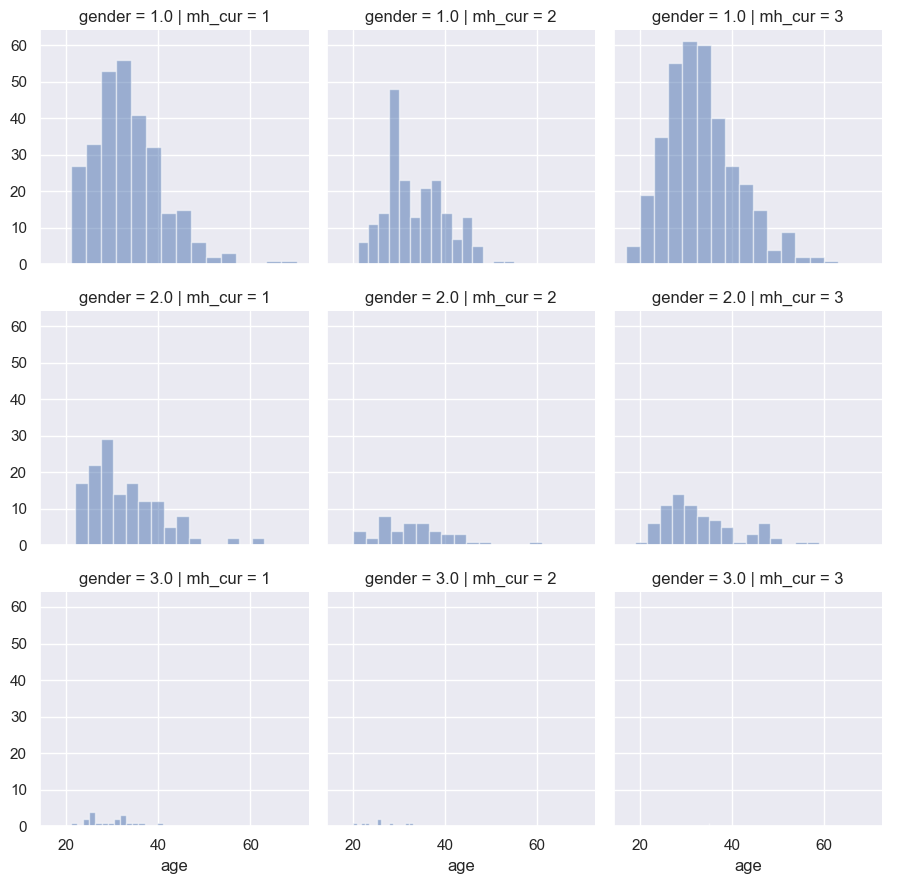

In [38]:
g = sns.FacetGrid(df10,row="gender",col="mh_cur")
g.map(plt.hist,'age',alpha=0.5,bins=15)
g.add_legend()
plt.show()

### 3.B Mental Health Disorders (MHD)
Notes on cleaning:
* Some questions ask for MHD Diagnosed (MHDD) or Suspected (MHDS) and MHD diagnosed by professional (MHDDP).
* MHDDP refer to MHDs that respondents have in the past and presently.
* While MHDD and MHDS refer to MHDs that respondents have or suspect present.
* I will clean up MHDD into a separate df and visualise it.
* All 3 columns (MHDS, MHDDP) will be dropped from df5 to form df6.
* Prior to MHD columns, respondents answer "Do you currently have a mental health disorder?" with Yes, No and Maybe.
    * If yes, they largely answered MHDD.
    * If maybe, they largely answered MHDS.
* Answers to MHDD can include more than 1 MHD, separated by '|'.
* Answeres to MHDD, for each MHD, includes a category name and sub disorders in '(...)'
* Multiple disorders will be accounted for, but only the category name will be noted.

Insights will be mentioned below the graph.

#### But first, some checks and cleaning up.

In [39]:
df5["If so, what condition(s) were you diagnosed with?"].describe()

count                                                   557
unique                                                   90
top       Mood Disorder (Depression, Bipolar Disorder, etc)
freq                                                    151
Name: If so, what condition(s) were you diagnosed with?, dtype: object

In [40]:
# df5.describe(include='all')
print("Responses to 'Do you have MHD?':")
print(df5["Do you currently have a mental health disorder?"].value_counts())
df5[["Do you currently have a mental health disorder?",
     "If yes, what condition(s) have you been diagnosed with?",
    "If maybe, what condition(s) do you believe you have?"]].describe(include='all').iloc[0,:]


Responses to 'Do you have MHD?':
1    445
3    435
2    251
Name: Do you currently have a mental health disorder?, dtype: int64


Do you currently have a mental health disorder?           1131.00
If yes, what condition(s) have you been diagnosed with?       439
If maybe, what condition(s) do you believe you have?          247
Name: count, dtype: object

In [41]:
# extract column
mhd_ser = df5["If yes, what condition(s) have you been diagnosed with?"]
# convert to dict
mhd_dt = dict(mhd_ser.value_counts())
mhd_dt


{'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 96,
 'Mood Disorder (Depression, Bipolar Disorder, etc)': 80,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)': 37,
 'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 21,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 18,
 'Attention Deficit Hyperactivity Disorder': 14,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Post-traumatic Stress Disorder': 10,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder': 9,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Obsessive-Compulsive Disorder': 9,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Diso

In [42]:
# create new dict to split and count diagnosis
mhd = {}
for dia, count in  mhd_dt.items():
    dia_ls = dia.split('|')
    for d in dia_ls:
        d = d.split(' (')[0]
        mhd[d] = mhd.get(d,0) + count
mhd


{'Anxiety Disorder': 267,
 'Mood Disorder': 322,
 'Attention Deficit Hyperactivity Disorder': 92,
 'Post-traumatic Stress Disorder': 50,
 'Obsessive-Compulsive Disorder': 36,
 'Eating Disorder': 18,
 'Substance Use Disorder': 31,
 'Addictive Disorder': 24,
 'Stress Response Syndromes': 27,
 'Personality Disorder': 22,
 'Psychotic Disorder': 4,
 'Dissociative Disorder': 5,
 'Sleeping Disorder': 1,
 'Sexual addiction': 1,
 'Autism spectrum disorder': 1,
 'Schizotypal Personality Disorder': 1,
 'ADD': 1,
 'Transgender': 1,
 'Autism Spectrum Disorder': 1,
 'Autism': 2,
 'Seasonal Affective Disorder': 1,
 'Pervasive Developmental Disorder': 1,
 'PTSD': 1,
 'Asperges': 1,
 'Traumatic Brain Injury': 1}

In [43]:
# convert counter dict into df
# append one entry for each count
# Create an empty DataFrame
mhd_df = pd.DataFrame(columns=['Diagnosis', 'Count'])

# Iterate through the dictionary and append rows to the DataFrame
for disorder, count in mhd.items():
    mhd_df = pd.concat([mhd_df, pd.DataFrame({'Diagnosis': [disorder], 'Count': [count]})], ignore_index=True)
    
# mass replacing values: group similar conditions under one category name
mhd_df = mhd_df.rename(columns={0:"Diagnosis"})
mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Autism Spectrum Disorder',
                            'Autism','Autism - while not a "mental illness", still greatly affects how I handle anxiety',
                            'PDD-NOS','autism spectrum disorder','Autism spectrum disorder'],"Austism")

mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['posttraumatic stress disourder','PTSD'],
                                                  'Post-traumatic Stress Disorder')

mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Attention Deficit Disorder',
                                                   'attention deficit disorder',
                                                   'ADD'],'Attention Deficit Hyperactivity Disorder')

mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Schizotypal Personality Disorder'],
                                                   'Personality Disorder')
mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Depression'],'Mood Disorder')
mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Depression'],'Mood Disorder')
mhd_df                                               


,Diagnosis,Count
0,Anxiety Disorder,267
1,Mood Disorder,322
2,Attention Deficit Hyperactivity Disorder,92
3,Post-traumatic Stress Disorder,50
4,Obsessive-Compulsive Disorder,36
5,Eating Disorder,18
6,Substance Use Disorder,31
7,Addictive Disorder,24
8,Stress Response Syndromes,27
9,Personality Disorder,22


In [44]:
# observe value count
mhd_df['Diagnosis'].value_counts()

Austism                                     3
Attention Deficit Hyperactivity Disorder    2
Post-traumatic Stress Disorder              2
Personality Disorder                        2
Anxiety Disorder                            1
Sleeping Disorder                           1
Asperges                                    1
Pervasive Developmental Disorder            1
Seasonal Affective Disorder                 1
Transgender                                 1
Sexual addiction                            1
Psychotic Disorder                          1
Dissociative Disorder                       1
Mood Disorder                               1
Stress Response Syndromes                   1
Addictive Disorder                          1
Substance Use Disorder                      1
Eating Disorder                             1
Obsessive-Compulsive Disorder               1
Traumatic Brain Injury                      1
Name: Diagnosis, dtype: int64

In [45]:
# place rare MHD under Others
mhd_df['Diagnosis']=mhd_df['Diagnosis'].replace([
    'Seasonal Affective Disorder','Asperger Syndrome','Asperges',
    'Suicidal Ideation','Gender Identity Disorder',
    'Psychotic Disorder','Dissociative Disorder',
    'Austism','Traumatic Brain Injury','Sleeping Disorder',
'Pervasive Developmental Disorder','Sexual addiction',
'Transgender'],'Others')
mhd_df['Diagnosis'].value_counts()

Others                                      12
Attention Deficit Hyperactivity Disorder     2
Post-traumatic Stress Disorder               2
Personality Disorder                         2
Anxiety Disorder                             1
Mood Disorder                                1
Obsessive-Compulsive Disorder                1
Eating Disorder                              1
Substance Use Disorder                       1
Addictive Disorder                           1
Stress Response Syndromes                    1
Name: Diagnosis, dtype: int64

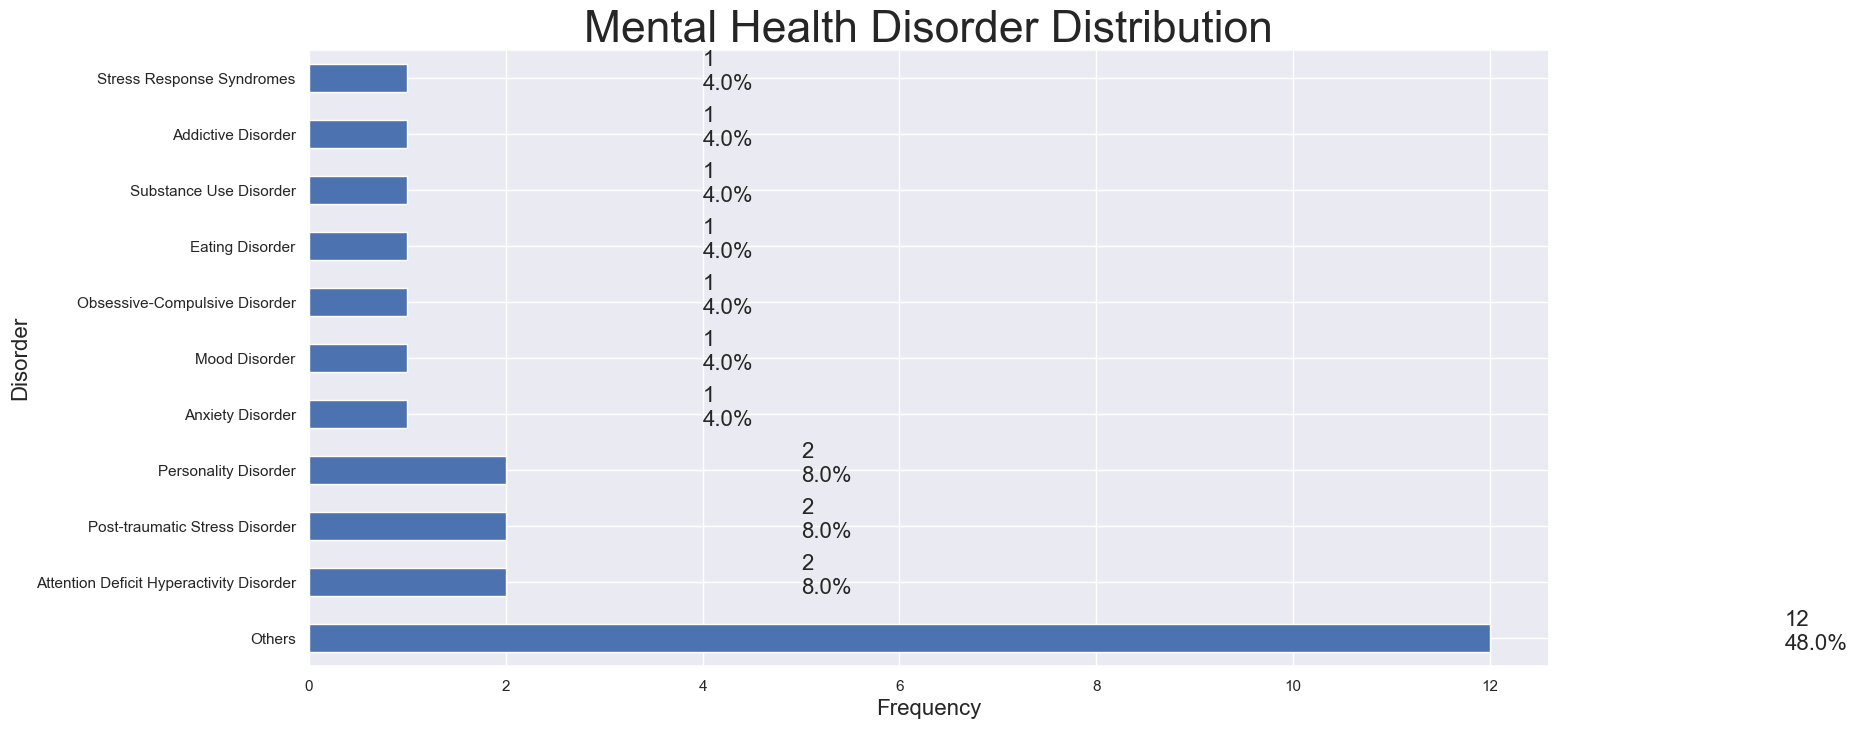

In [46]:
# plot
plot_df = mhd_df['Diagnosis'].value_counts()

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(111)

plot_df.plot(kind='barh',ax=ax1)
ax1.set_title("Mental Health Disorder Distribution",fontsize=fs*2)
ax1.set_ylabel("Disorder",fontsize=fs)
ax1.set_xlabel("Frequency",fontsize=fs)

total=plot_df.sum()
[ax1.text(v+3,i-0.2,
          '{}\n{:.1f}%'.format(str(v),v/total*100),
          fontsize=fs) for i, v in enumerate(plot_df)]

plt.show()

* Mood Disorders form the largest proportion of MHDs among the surveyed, at 35.3% or 322 out of 912 instances of MHDs.
    * Mood Disorder causes one's general emotional state or mood to be distorted or inconsistent with circumstances, interfering with the one's ability to function.
* Anxiety Disorder is 2nd at 29.3%.
    * Anxiety Disorder also affects one's mood and often occurs alongside depression, which falls under Mood Disorders.
    * This may be why Anxiety Disorder is the 2nd most frequent MHD among the surveyed, slightly less than the frequency of Mood Disorders but much more than the 3rd most frequent disorder.
* ADHD is 3rd at 10.2%.
* A myriad of other disorders follow at around 2.0-5.6% in frequency, or less than 56 persons among 1000.
* Given that the most frequent disorders are Mood and Anxiety, which appear to largely affect the mood, it may not be a surprise that employers find it hard to accept or treat employees with these MHDs kindly.
* That is, an employer may perceive employee to simply be moody or difficult than actually suffering from a disorder that requires medical attention.
* Disorders like substance-abuse, PTSD, addictive might be more likely to raise medical concern, but these appear infrequently.

### 3.C Mental Health Status and Company Size
* The varying proportions across company size is largely due to the distribution of company sizes.
* For companies with 26-100 employees, there is a noticeably larger proportion of employees with current MHD than employees without.
    * Furthermore, there is relatively less uncertainty (mh_cur = 2) for these companies.
    * See how the proportion of people who are unsure is comparable across companies of sizes 6-25, 26-100, and 101-500, although the frequency of these companies differ.
* Similarly for companies with 101-500 employees, although the increment is less obvious.
* There is noticeably more people who do not have MHD in companies of size 501-1000 than people who do.

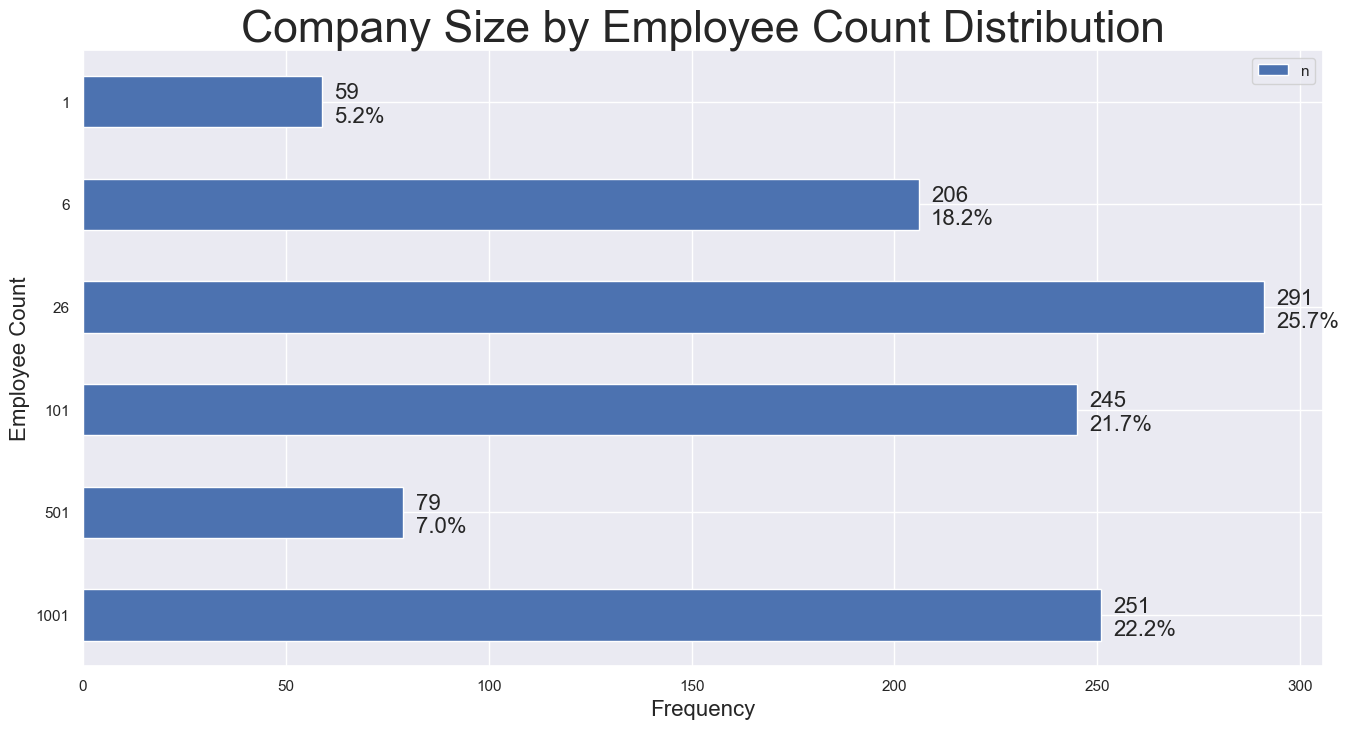

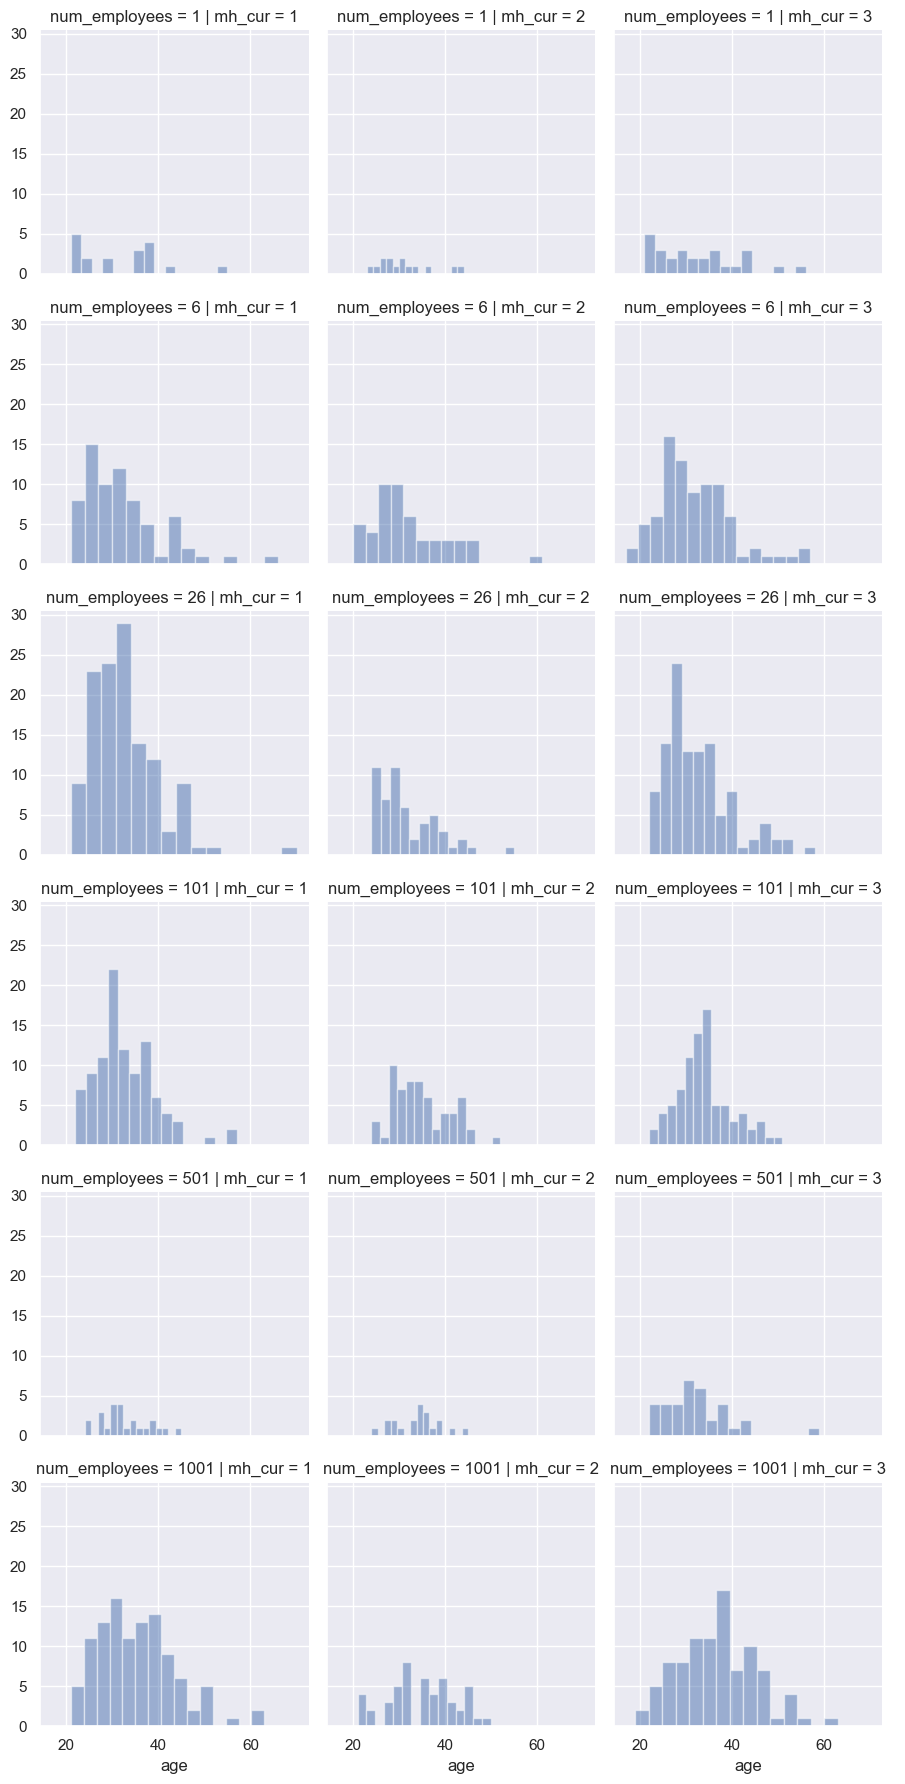

In [47]:
# Company Size Distribution
plot_df = df10['num_employees'].value_counts().reset_index(name='n').rename(columns={"index":"num_employees"}).sort_values("num_employees",ascending=False)
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
plot_df.plot(kind='barh',x = "num_employees", y = "n",ax=ax1)
ax1.set_title("Company Size by Employee Count Distribution",fontsize=fs*2)
ax1.set_ylabel("Employee Count",fontsize=fs)
ax1.set_xlabel("Frequency",fontsize=fs)
total=plot_df["n"].sum()
[ax1.text(v+3,i-0.2,
          '{}\n{:.1f}%'.format(str(v),v/total*100),
          fontsize=fs) for i, v in enumerate(plot_df["n"])]

# Prevalence of MHD across Company Size and Age
g = sns.FacetGrid(df10,row="num_employees",col="mh_cur")
g.map(plt.hist,'age',alpha=0.5,bins=15)
g.add_legend()

plt.show()

### 3.D Correlation Matrix of Features

In [48]:
# obtain list of feat names
cdf10 = col_ls(df10)


0 num_employees
1 tech_company_or_role
2 cep_benefits
3 cep_know_options
4 cep_discuss
5 cep_learn
6 cep_anon
7 cep_mh_leave
8 cep_mh_ncsq
9 cep_ph_ncsq
10 cep_comf_cw
11 cep_comf_sup
12 cep_serious
13 cep_others_ncsq
14 pep_have
15 pep_benefits
16 pep_know_options
17 pep_discuss
18 pep_learn
19 pep_anon
20 pep_mh_ncsq
21 pep_ph_ncsq
22 pep_comf_cw
23 pep_comf_sup
24 pep_serious
25 pep_others_ncsq
26 fep_ph_willing
27 fep_mh_willing
28 hurt_career
29 cw_view_neg
30 comf_ff
31 neg_response
32 mh_fam_hist
33 mh_hist
34 mh_cur
35 mh_diag_pro
36 sought_treat
37 work_affect_effect
38 work_affect_ineffect
39 age
40 gender
41 work_country
42 work_remote


In [49]:
# create df where all -1 (N.A. responses) are replaced with np.NaN
df10_nan=df10.replace({-1:np.NaN})
df10_nan.describe()

,num_employees,tech_company_or_role,cep_benefits,cep_know_options,cep_discuss,cep_learn,cep_anon,cep_mh_leave,cep_mh_ncsq,cep_ph_ncsq,cep_comf_cw,cep_comf_sup,cep_serious,cep_others_ncsq,pep_have,pep_benefits,pep_know_options,pep_discuss,pep_learn,pep_anon,pep_mh_ncsq,pep_ph_ncsq,pep_comf_cw,pep_comf_sup,pep_serious,pep_others_ncsq,fep_ph_willing,fep_mh_willing,hurt_career,cw_view_neg,comf_ff,neg_response,mh_fam_hist,mh_hist,mh_cur,mh_diag_pro,sought_treat,work_affect_effect,work_affect_ineffect,age,gender,work_country,work_remote
count,1131.00,1131.00,1050.00,998.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1131.00,1131.00,1131.00,1131.00,1052.00,1080.00,1131.00,1131.00,1131.00,1131.00,1131.00,683.00,753.00,1131.00,1131.00,1131.00,1131.00
mean,286.86,0.78,1.70,2.05,2.52,2.21,1.80,2.74,2.20,2.70,2.10,1.92,1.96,1.92,1.11,2.65,2.85,3.39,3.22,2.73,2.27,2.39,2.28,2.68,2.93,2.58,2.07,2.55,2.62,3.03,2.42,3.04,1.87,1.82,1.99,1.50,1.43,2.62,1.53,33.32,1.28,3.27,2.08
std,400.19,0.41,0.78,0.81,0.80,0.82,0.56,1.24,0.73,0.53,0.76,0.81,0.75,0.27,0.32,1.04,1.14,0.93,1.05,0.82,0.85,0.60,0.59,1.03,0.92,0.58,0.76,0.64,0.85,0.89,1.14,1.05,0.89,0.90,0.88,0.50,0.49,0.82,0.67,7.56,0.50,6.73,0.68
min,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,17.00,1.00,0.00,1.00
25%,26.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,28.00,1.00,1.00,2.00
50%,101.00,1.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,3.00,2.00,2.00,2.00,2.00,1.00,3.00,3.00,4.00,4.00,3.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,2.00,3.00,2.00,1.00,2.00,2.00,1.00,3.00,1.00,32.00,1.00,1.00,2.00
75%,501.00,1.00,2.00,3.00,3.00,3.00,2.00,4.00,3.00,3.00,3.00,3.00,3.00,2.00,1.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,2.00,2.00,3.00,2.00,38.00,2.00,2.00,3.00
max,1001.00,1.00,3.00,3.00,3.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,2.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,4.00,4.00,3.00,3.00,3.00,5.00,5.00,5.00,4.00,3.00,3.00,3.00,2.00,2.00,4.00,4.00,70.00,3.00,43.00,3.00


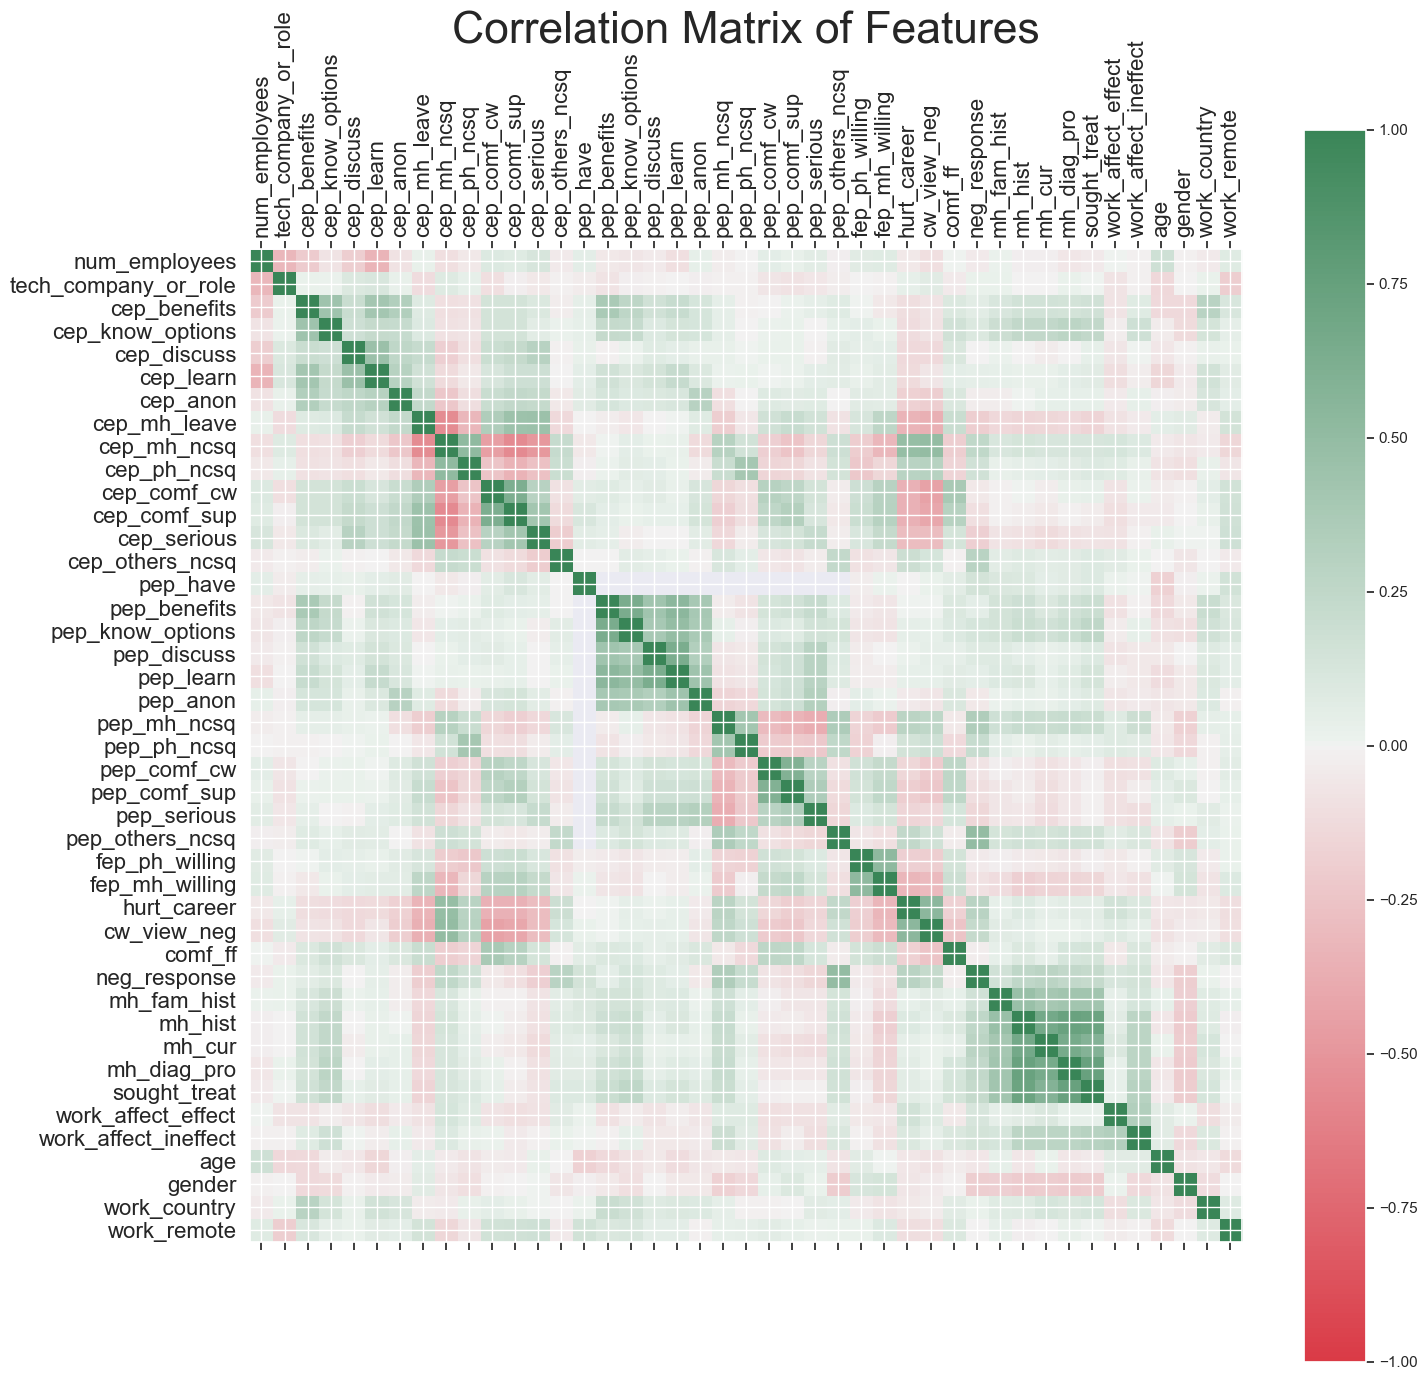

In [50]:
# plot correlatin matrix
corr = df10_nan.corr() # use df with NaN values
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = cdf10
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Features",fontsize=fs*2,y=1.2)

plt.show()

There are a zones where correlation is stronger.
* Top left: features regarding current employment.
* Middle: features regarding past employment.
* Middle, Bottom Right: features regarding future employment and views of others.
* Bottom right: features regarding mental health history, diagnosis, treatment and effect upon work.
* Bottom left (& Top right): features regarding sentiment towards mental health and comfort in sharing about it.

NaN values are accounted for.

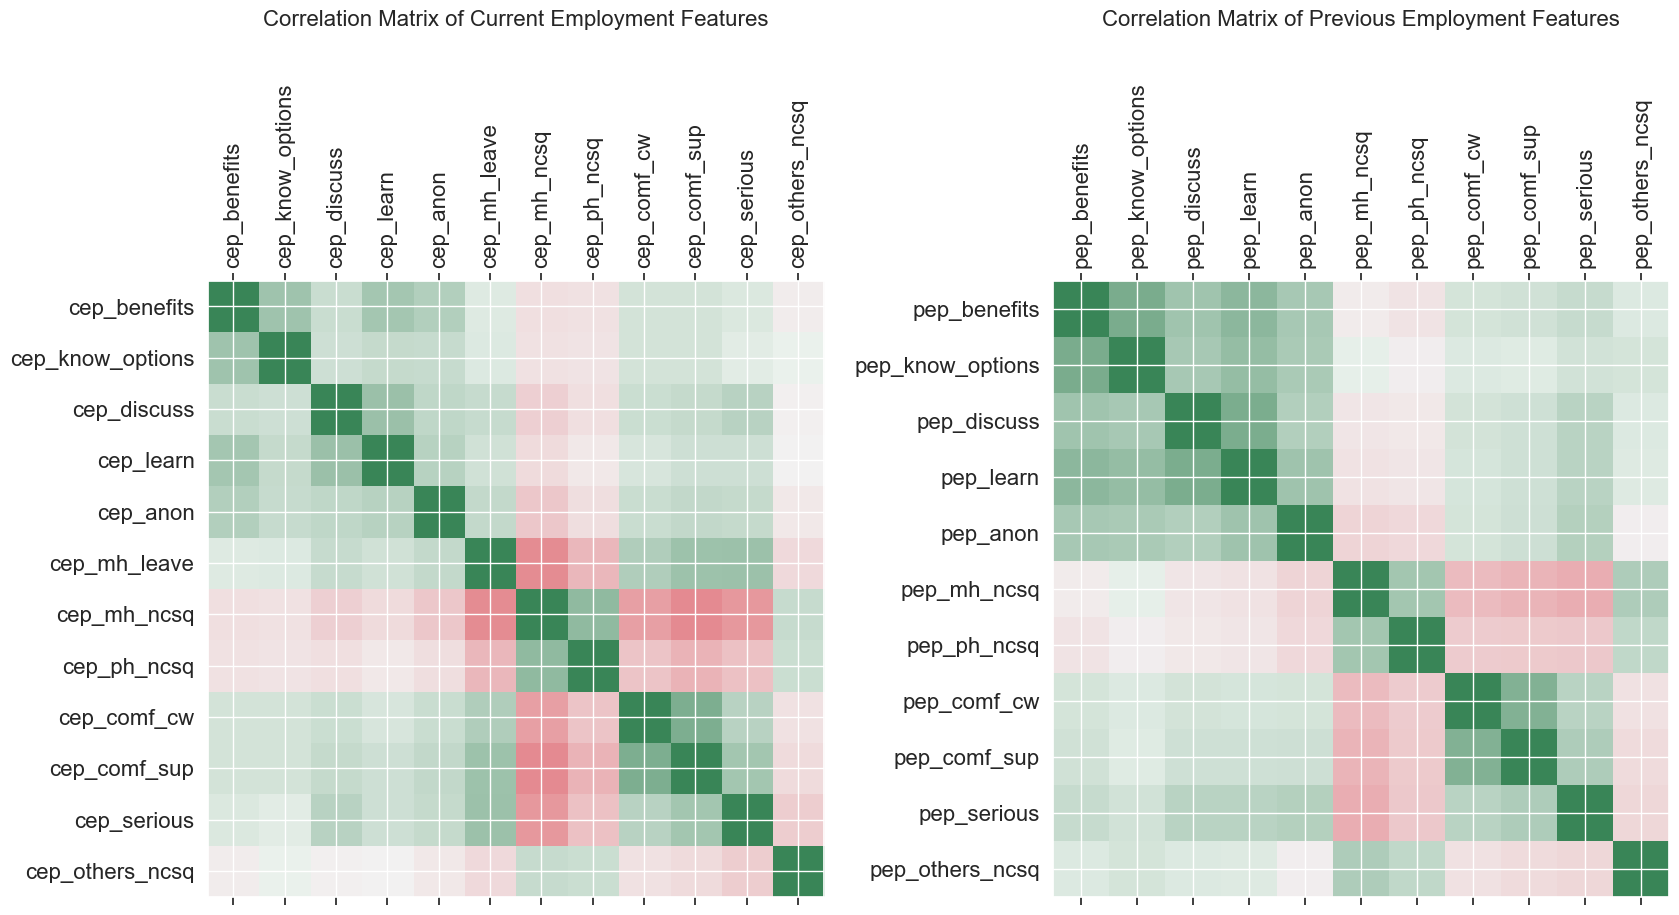

In [51]:
# top left: current employment
cep_ls=cdf10[2:14]
corr = df10_nan[cep_ls].corr()
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
cax = ax1.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))

names = cep_ls
ticks = np.arange(0,len(names),1)
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
ax1.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax1.set_yticklabels(names, fontsize=fs)
ax1.set_title("Correlation Matrix of Current Employment Features",fontsize=fs,y=1.4)

# fig.colorbar(cax) # intentionally left out for easier comparison between CM graphs

# middle: previous employment
pep_ls=cdf10[15:26]
df_corr = df10_nan[pep_ls]
corr = df_corr.corr()
ax2 = fig.add_subplot(122)
cax = ax2.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
names = pep_ls
ticks = np.arange(0,len(names),1)
ax2.set_xticks(ticks)
ax2.set_yticks(ticks)
ax2.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax2.set_yticklabels(names, fontsize=fs)
ax2.set_title("Correlation Matrix of Previous Employment Features",fontsize=fs,y=1.4)

plt.show()

Notable correlations from Current Employment Features:
* The lesser sense of threat from bringing up MH, the easier to obtain leave for MH issues.
* The greater the sense of threat from bringing up PH, the greater the sense of threat from bring up MH.
* The greater the comfort in sharing about MH with coworkers or supervisors, the easier to obtain leave for MH issues.
* The more employer views MH as seriously as PH, the less the sense of threat from bringing up MH.

Notable correlations from Previous Employment Features:
* Features of previous employment related to company policy (e.g. availability of MH benefits) is more strongly positively related than compared to features of current employment.
* However, the negative correlation between comfort of sharing about MH issues with supervisors & coworkers and sense of threat of raising MH issues is milder for previous employment than current employment.
* The general direction of correlation is similar for both previous and current employment features.

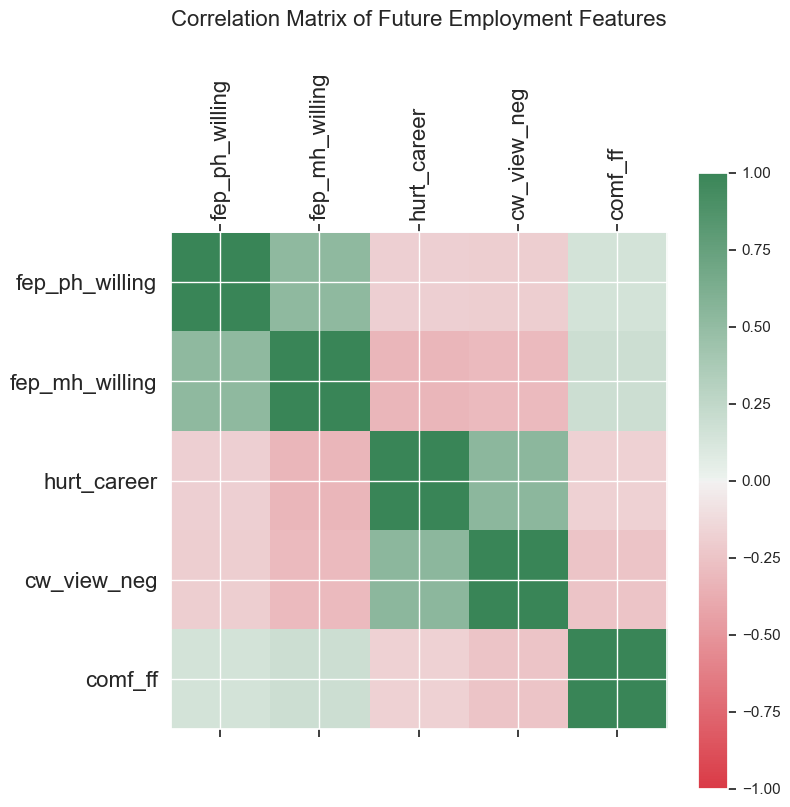

In [52]:
# middle, bottom right: future employment and perceptions
fep_ls=cdf10[26:31]
corr = df10_nan[fep_ls].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = fep_ls
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Future Employment Features",fontsize=fs,y=1.4)

plt.show()

Notable correlations from Future Employment Features:
* The more willing one is with sharing about PH, the more willing one is with sharing about MH.
* The more one feels that being identified as having MHD will hurt one's career, the less willing one is to share about MH.
* The more one feels that coworkers will view one more negatively if one has MHD, the more one feels that being identified as having MHD will hurt one's career.

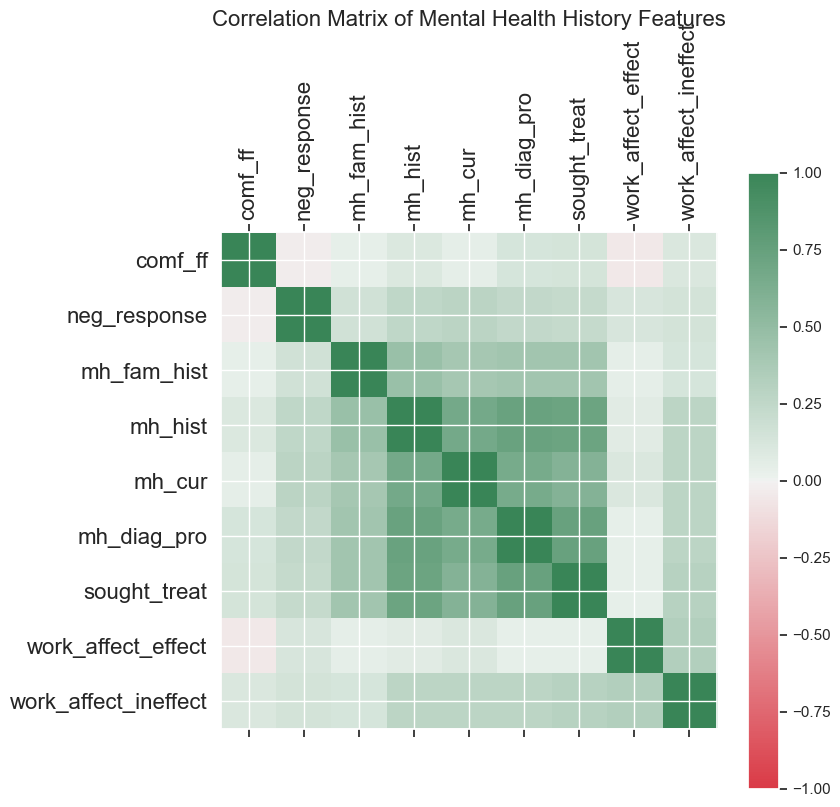

In [53]:
# bottom right: mental health history
mhh_ls=cdf10[30:39]
corr = df10_nan[mhh_ls].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = mhh_ls
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Mental Health History Features",fontsize=fs,y=1.4)

plt.show()

Notable correlations from Mental Health History Features:
* The strongest correlations are found in this slice of the general CM.
* One's comfort in sharing with family and friends is surprisingly only mildly or not correlated with features like
    * one's experience or observation of negative response to opening up about MH issues
    * one's family history of MH issues
    * one's current or historical MH status
* As expected, if one has a history of MHD or has been professionally diagnosed, one is more likely to have sought treatment for MHD.
* There seems to be no correlation between the degree of MHD's interference with work (when treated effectively) and whether one has sought treatment for MHD.
    * However, the more one finds that work is interfered when MHD is not effectively treated, the more likely one has sought treatment for MHD.

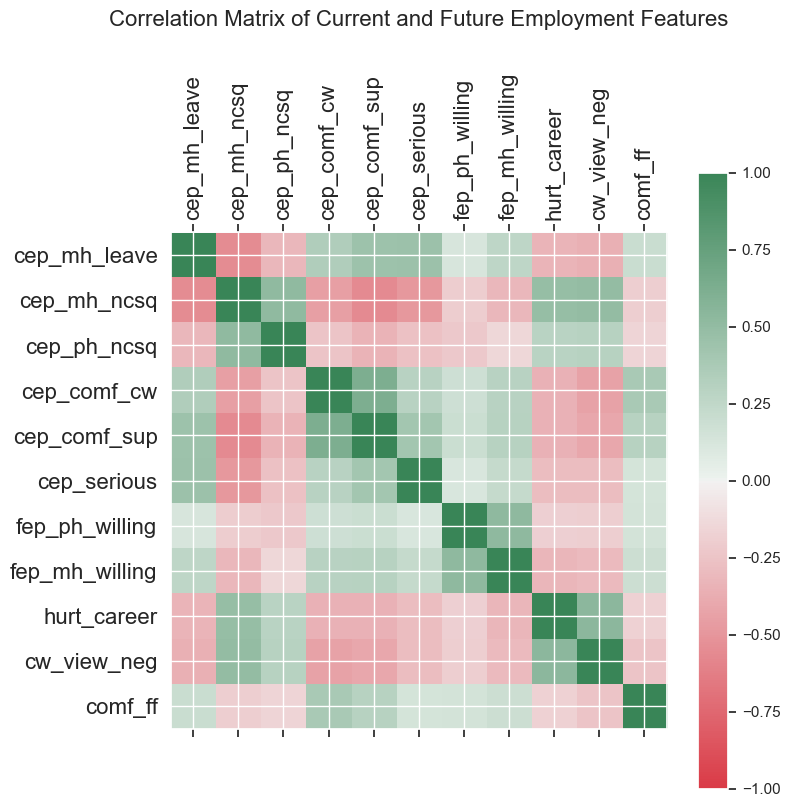

In [54]:
# bottomn left: current employment and future employment
cfep_ls = cdf10[7:13] + cdf10[26:31]
corr = df10_nan[cfep_ls].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = cfep_ls
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Current and Future Employment Features",fontsize=fs,y=1.4)

plt.show()

## 4. Classifiers

* Predict degree of comfort in sharing about MH issues with Future Employers ("fep_mh_willing") based on profile and current & past experiences.
* Predict whether one will seek professional diagnosis ("mh_diag_pro") based on profile and current & past experiences.
* Predict whether one will seek treatment ("sought_treatment") based on profile and current & past experiences.

In [55]:
# prepare x variables
profile_ls = cdf10[0:2] + cdf10[30:31] + cdf10[32:35] + cdf10[39:]
cpep_ls = cdf10[2:14] + cdf10[14:26] + cdf10[28:30] + cdf10[31:32] + cdf10[37:39]
# profile_ls
# cpep_ls
x_col = profile_ls + cpep_ls
x_col


['num_employees',
 'tech_company_or_role',
 'comf_ff',
 'mh_fam_hist',
 'mh_hist',
 'mh_cur',
 'age',
 'gender',
 'work_country',
 'work_remote',
 'cep_benefits',
 'cep_know_options',
 'cep_discuss',
 'cep_learn',
 'cep_anon',
 'cep_mh_leave',
 'cep_mh_ncsq',
 'cep_ph_ncsq',
 'cep_comf_cw',
 'cep_comf_sup',
 'cep_serious',
 'cep_others_ncsq',
 'pep_have',
 'pep_benefits',
 'pep_know_options',
 'pep_discuss',
 'pep_learn',
 'pep_anon',
 'pep_mh_ncsq',
 'pep_ph_ncsq',
 'pep_comf_cw',
 'pep_comf_sup',
 'pep_serious',
 'pep_others_ncsq',
 'hurt_career',
 'cw_view_neg',
 'neg_response',
 'work_affect_effect',
 'work_affect_ineffect']

In [56]:
# prepare y variables
y1_col = "fep_mh_willing"
y2_col = "mh_diag_pro"
y3_col = "sought_treat"


In [57]:
X = df10[x_col]
y1 = df10[y1_col]
y2 = df10[y2_col]
y3 = df10[y3_col]

### 4.A RFC: Openness about MH with Future Employer (93%)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [59]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y1, 
                                                    test_size = 0.25,
                                                   random_state=42)
print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

num_employees           848
tech_company_or_role    848
comf_ff                 848
mh_fam_hist             848
mh_hist                 848
mh_cur                  848
age                     848
gender                  848
work_country            848
work_remote             848
cep_benefits            848
cep_know_options        848
cep_discuss             848
cep_learn               848
cep_anon                848
cep_mh_leave            848
cep_mh_ncsq             848
cep_ph_ncsq             848
cep_comf_cw             848
cep_comf_sup            848
cep_serious             848
cep_others_ncsq         848
pep_have                848
pep_benefits            848
pep_know_options        848
pep_discuss             848
pep_learn               848
pep_anon                848
pep_mh_ncsq             848
pep_ph_ncsq             848
pep_comf_cw             848
pep_comf_sup            848
pep_serious             848
pep_others_ncsq         848
hurt_career             848
cw_view_neg         

In [60]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)  
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)

In [61]:
# Returns the mean accuracy on the given test data and labels.
clf.score(X,y1)
# 0.9221927497789567

0.9310344827586207

In [62]:
print(clf.feature_importances_)

[0.03525522 0.01388844 0.03636901 0.0224697  0.02344435 0.02036097
 0.06622    0.01356463 0.03851513 0.0266622  0.02543896 0.02728949
 0.01534415 0.02301351 0.01731289 0.03444712 0.02648184 0.01207574
 0.02768971 0.03139214 0.02702903 0.00531771 0.00162362 0.02638943
 0.02436232 0.01522151 0.01534362 0.01932827 0.02580733 0.01784908
 0.02380287 0.03674167 0.02622399 0.01640746 0.06243868 0.04150505
 0.02913061 0.02390325 0.02433929]


In [63]:
y1_feat_impt = list(clf.feature_importances_)
y1_feat_impt
y1_df = pd.DataFrame({"Feature":x_col,"Importance":y1_feat_impt})
y1_sort_df = y1_df.sort_values("Importance")

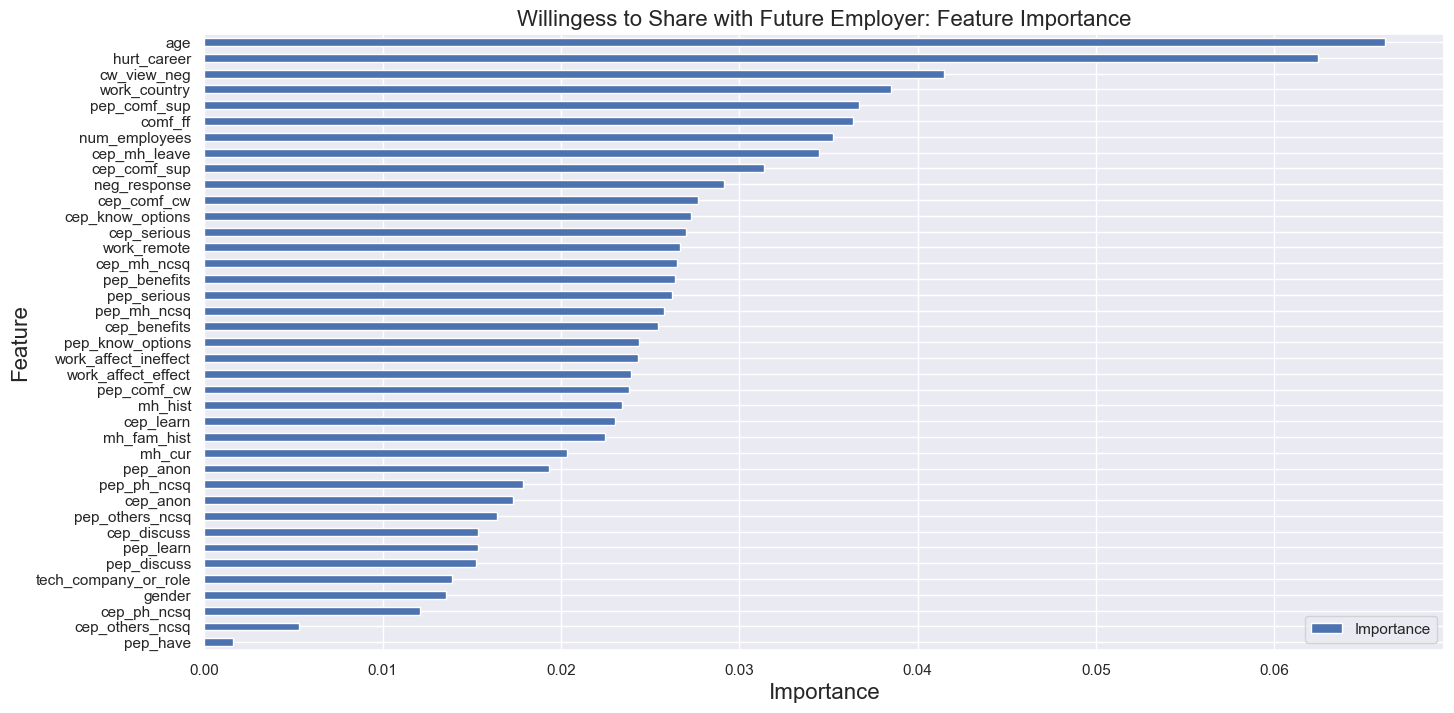

In [64]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y1_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Willingess to Share with Future Employer: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

* Age is the most important predictor, although there appears to be no linear correlation with willingess to share about MH with future employer, as observed in the Correlation MAtrix (CM) below.
* The sentiment that being identified as having MHD as detrimental to one's career is the next most mportant predictor.
* Intuitively, the more one feels that being identified with MHD will hurt one's career, the less likely one will bring it up with a future employer.

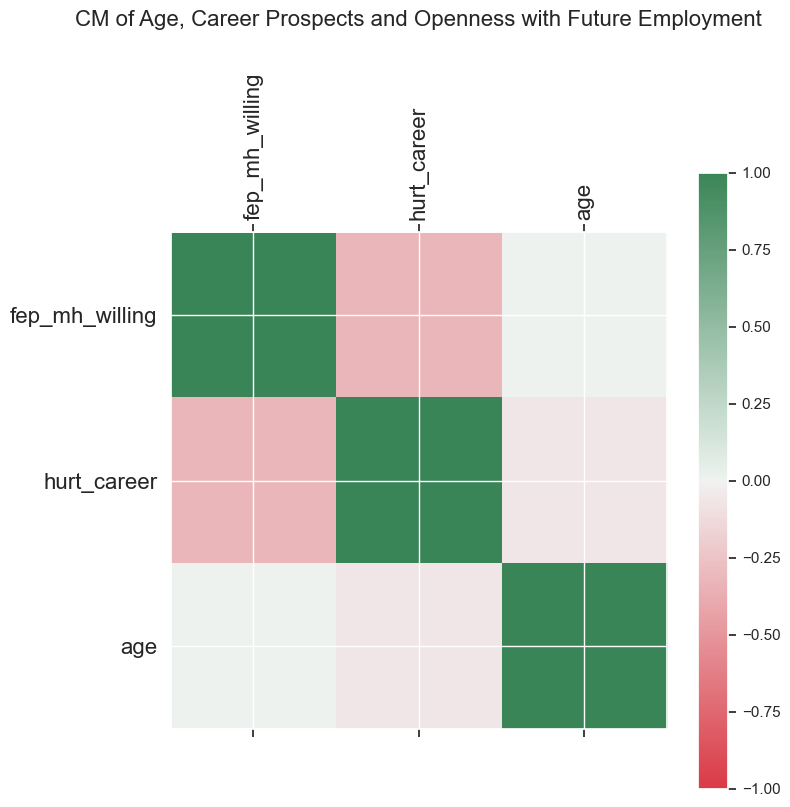

In [65]:
# To study the links between openness with future employer, age and career prospect
tmp = cdf10[27:29] + cdf10[39:40]
corr = df10_nan[tmp].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = tmp
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("CM of Age, Career Prospects and Openness with Future Employment",fontsize=fs,y=1.4)

plt.show()

In [66]:
# Save the trained model to a file
joblib.dump(clf, 'openness_rf.pkl')

['openness_rf.pkl']

### 4.B RFC: Seeking Professional Diagnosis (90+%)

In [67]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y2, 
                                                    test_size = 0.25,
                                                   )
print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

num_employees           848
tech_company_or_role    848
comf_ff                 848
mh_fam_hist             848
mh_hist                 848
mh_cur                  848
age                     848
gender                  848
work_country            848
work_remote             848
cep_benefits            848
cep_know_options        848
cep_discuss             848
cep_learn               848
cep_anon                848
cep_mh_leave            848
cep_mh_ncsq             848
cep_ph_ncsq             848
cep_comf_cw             848
cep_comf_sup            848
cep_serious             848
cep_others_ncsq         848
pep_have                848
pep_benefits            848
pep_know_options        848
pep_discuss             848
pep_learn               848
pep_anon                848
pep_mh_ncsq             848
pep_ph_ncsq             848
pep_comf_cw             848
pep_comf_sup            848
pep_serious             848
pep_others_ncsq         848
hurt_career             848
cw_view_neg         

In [68]:
clf2 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf2.fit(X_train, y_train)  
y_pred = clf2.predict(X_test)

In [69]:
# Returns the mean accuracy on the given test data and labels.
clf2.score(X,y2)
# 0.9664014146772767

0.9699381078691424

In [70]:
print(clf2.feature_importances_)

[0.01323718 0.00417513 0.02178819 0.02990534 0.19122067 0.12774725
 0.02862774 0.01147994 0.01572159 0.0115631  0.01386237 0.01924648
 0.00635113 0.00893745 0.00800116 0.01508391 0.00838669 0.0053364
 0.00952264 0.00890648 0.0094468  0.00362117 0.00082983 0.01128621
 0.01334297 0.00731259 0.00681475 0.00826095 0.01230343 0.00731012
 0.00718669 0.00880002 0.00899666 0.00629843 0.01317069 0.013787
 0.01630274 0.19169366 0.09413444]


In [71]:
y2_feat_impt = list(clf2.feature_importances_)
# y2_feat_impt
y2_df = pd.DataFrame({"Feature":x_col,"Importance":y2_feat_impt})
y2_sort_df = y2_df.sort_values("Importance")

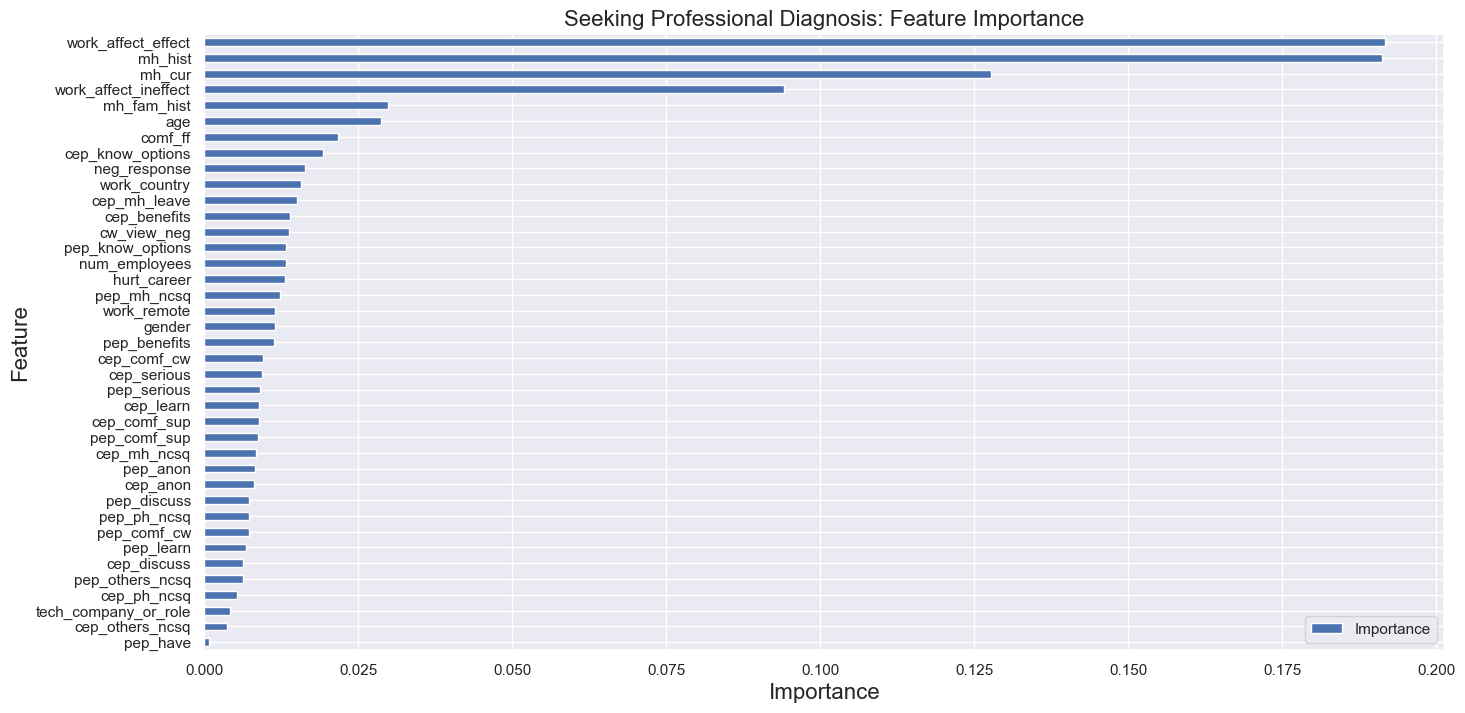

In [72]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y2_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Seeking Professional Diagnosis: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

In [73]:
# drop features and retry classifier
try:
    X = X.drop(["mh_hist","mh_cur","work_affect_effect", "work_affect_ineffect"],axis=1)
except: print(err_msg)

In [74]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y2, 
                                                    test_size = 0.25)
print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

num_employees           848
tech_company_or_role    848
comf_ff                 848
mh_fam_hist             848
age                     848
gender                  848
work_country            848
work_remote             848
cep_benefits            848
cep_know_options        848
cep_discuss             848
cep_learn               848
cep_anon                848
cep_mh_leave            848
cep_mh_ncsq             848
cep_ph_ncsq             848
cep_comf_cw             848
cep_comf_sup            848
cep_serious             848
cep_others_ncsq         848
pep_have                848
pep_benefits            848
pep_know_options        848
pep_discuss             848
pep_learn               848
pep_anon                848
pep_mh_ncsq             848
pep_ph_ncsq             848
pep_comf_cw             848
pep_comf_sup            848
pep_serious             848
pep_others_ncsq         848
hurt_career             848
cw_view_neg             848
neg_response            848
dtype: int64
848
num

In [75]:
clf2 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf2.fit(X_train, y_train)  
# y_pred = clf.predict(X_test, y_test)

RandomForestClassifier(n_estimators=200, random_state=0)

In [76]:
# Returns the mean accuracy on the given test data and labels.
clf2.score(X,y2)
# 0.9310344827586207, drop from 0.9752431476569408
# but still pretty accurate

0.9283819628647215

In [77]:
print(clf2.feature_importances_)

[0.0378994  0.01131362 0.06135498 0.09495446 0.06760098 0.02259692
 0.03924038 0.02364963 0.03088576 0.04468484 0.01592785 0.0214536
 0.02037562 0.03899944 0.02125509 0.01579344 0.02133149 0.01961049
 0.02443865 0.0052702  0.00134069 0.03174562 0.03067621 0.01515581
 0.01504087 0.01997811 0.03392136 0.01980981 0.01761272 0.02281072
 0.02241989 0.01708572 0.03864268 0.03203615 0.0430868 ]


In [78]:
y2_feat_impt = list(clf2.feature_importances_)
# y2_feat_impt
y2_df = pd.DataFrame({"Feature":X.columns.tolist(),"Importance":y2_feat_impt})
y2_sort_df = y2_df.sort_values("Importance")

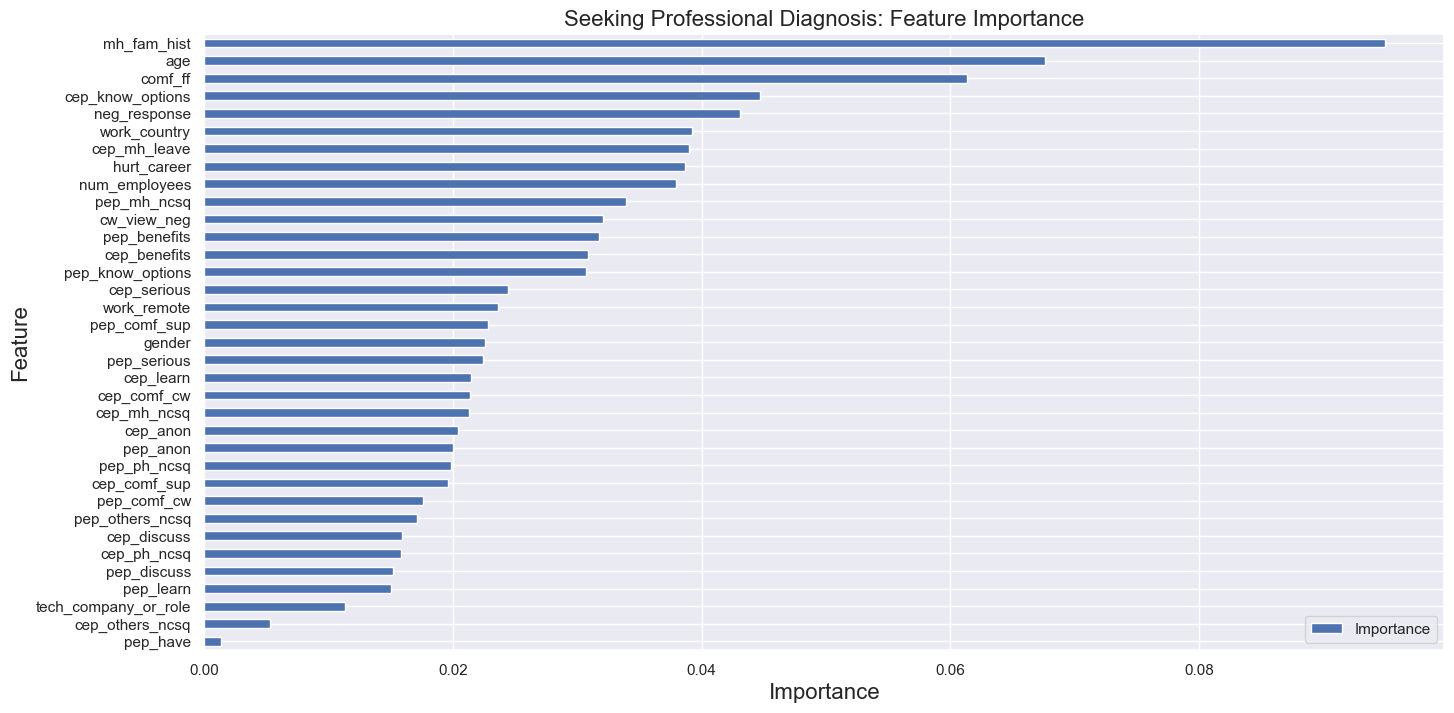

In [79]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y2_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Seeking Professional Diagnosis: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

* Having a family history of MH issues is the most important predictor of seeking professional diagnosis.
* Age and openness in sharing about MHD with family or friends are also important predictors over the remaining features.
    * The older, the more likely to seek professional diagnosis.
    * The more comfortable with family or friends, the more likely to seek diagnosis.
* The most important predictors related to current employment are knowing the MH care options provided by current employment as well as ease of obtaining leave for MH.
    * The more one knows one's options with current employer, the more one may seek diagnosis.
    * Curiously, the harder to obtain leave for MH, the more likely one may seek diagnosis.
* The experience of negative responses to MH issues is a similarly important predictor.
    * The less negative response experienced or observed, the more one may seek diagnosis. 

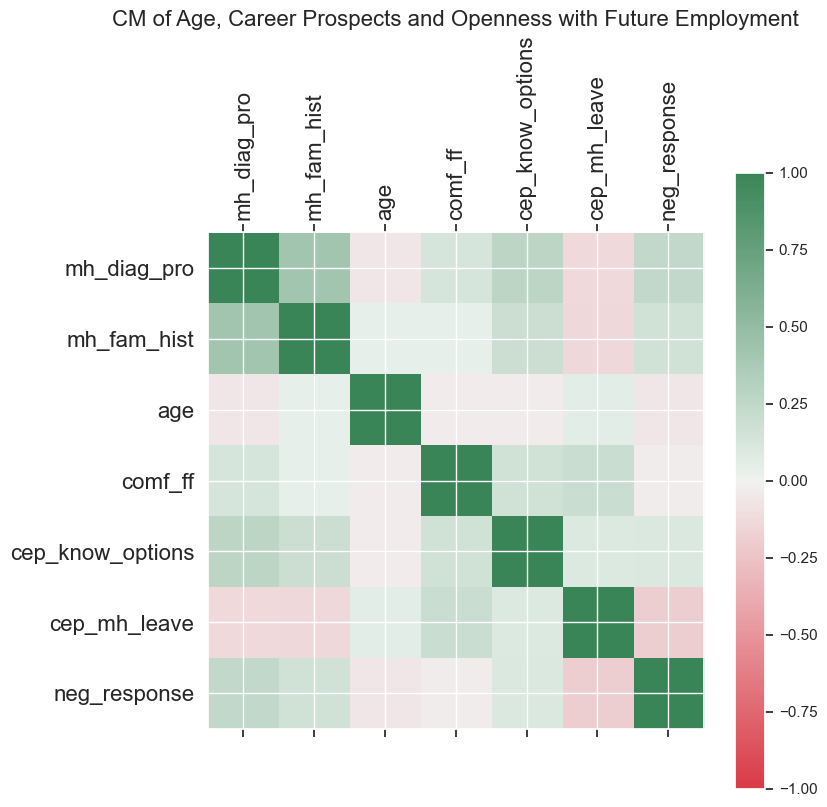

In [80]:
# To study the links between openness with future employer, age and career prospect
tmp = cdf10[35:36] + cdf10[32:33] + cdf10[39:40] + cdf10[30:31] + cdf10[3:4] + cdf10[7:8] + cdf10[31:32]
corr = df10_nan[tmp].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = tmp
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("CM of Age, Career Prospects and Openness with Future Employment",fontsize=fs,y=1.4)

plt.show()

In [81]:
# Save the trained model to a file
joblib.dump(clf2, 'diag_pro_rf.pkl')

['diag_pro_rf.pkl']

### 4.C RFC: Seeking Treatment (90+%)

In [82]:
# reset X
X = df10[x_col]

In [83]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y3, 
                                                    test_size = 0.25,
                                                   )
print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

num_employees           848
tech_company_or_role    848
comf_ff                 848
mh_fam_hist             848
mh_hist                 848
mh_cur                  848
age                     848
gender                  848
work_country            848
work_remote             848
cep_benefits            848
cep_know_options        848
cep_discuss             848
cep_learn               848
cep_anon                848
cep_mh_leave            848
cep_mh_ncsq             848
cep_ph_ncsq             848
cep_comf_cw             848
cep_comf_sup            848
cep_serious             848
cep_others_ncsq         848
pep_have                848
pep_benefits            848
pep_know_options        848
pep_discuss             848
pep_learn               848
pep_anon                848
pep_mh_ncsq             848
pep_ph_ncsq             848
pep_comf_cw             848
pep_comf_sup            848
pep_serious             848
pep_others_ncsq         848
hurt_career             848
cw_view_neg         

In [84]:
clf3 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf3.fit(X_train, y_train)  
y_pred = clf3.predict(X_test)

In [85]:
X_test.iloc[5].to_dict()

{'num_employees': 1001.0,
 'tech_company_or_role': 1.0,
 'comf_ff': 2.0,
 'mh_fam_hist': 3.0,
 'mh_hist': 1.0,
 'mh_cur': 2.0,
 'age': 46.0,
 'gender': 1.0,
 'work_country': 1.0,
 'work_remote': 1.0,
 'cep_benefits': 2.0,
 'cep_know_options': 2.0,
 'cep_discuss': 3.0,
 'cep_learn': 2.0,
 'cep_anon': 2.0,
 'cep_mh_leave': 3.0,
 'cep_mh_ncsq': 2.0,
 'cep_ph_ncsq': 2.0,
 'cep_comf_cw': 3.0,
 'cep_comf_sup': 3.0,
 'cep_serious': 3.0,
 'cep_others_ncsq': 2.0,
 'pep_have': 1.0,
 'pep_benefits': 2.0,
 'pep_know_options': 2.0,
 'pep_discuss': 4.0,
 'pep_learn': 2.0,
 'pep_anon': 3.0,
 'pep_mh_ncsq': 2.0,
 'pep_ph_ncsq': 2.0,
 'pep_comf_cw': 2.0,
 'pep_comf_sup': 2.0,
 'pep_serious': 4.0,
 'pep_others_ncsq': 3.0,
 'hurt_career': 3.0,
 'cw_view_neg': 3.0,
 'neg_response': 3.0,
 'work_affect_effect': 2.0,
 'work_affect_ineffect': 2.0}

In [86]:
y_pred

array([2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1],
      dtype=int64)

In [87]:
# Returns the mean accuracy on the given test data and labels.
clf3.score(X,y3)
# 0.969053934571176

0.9681697612732095

In [88]:
print(clf3.feature_importances_)

[0.01670318 0.00525051 0.02190727 0.03429031 0.18951845 0.08372778
 0.02826972 0.01188733 0.02509639 0.01095103 0.01500888 0.01694006
 0.00787368 0.01071083 0.01043158 0.01846523 0.01013351 0.0090883
 0.01165289 0.00967074 0.01217748 0.00379287 0.00095028 0.01512109
 0.01609857 0.01035804 0.00745502 0.00948894 0.01337725 0.00956017
 0.01289531 0.01175979 0.01452381 0.00802445 0.01418511 0.01450103
 0.01564237 0.15985359 0.10265716]


In [89]:
y3_feat_impt = list(clf.feature_importances_)
# y3_feat_impt
y3_df = pd.DataFrame({"Feature":x_col,"Importance":y3_feat_impt})
y3_sort_df = y3_df.sort_values("Importance")

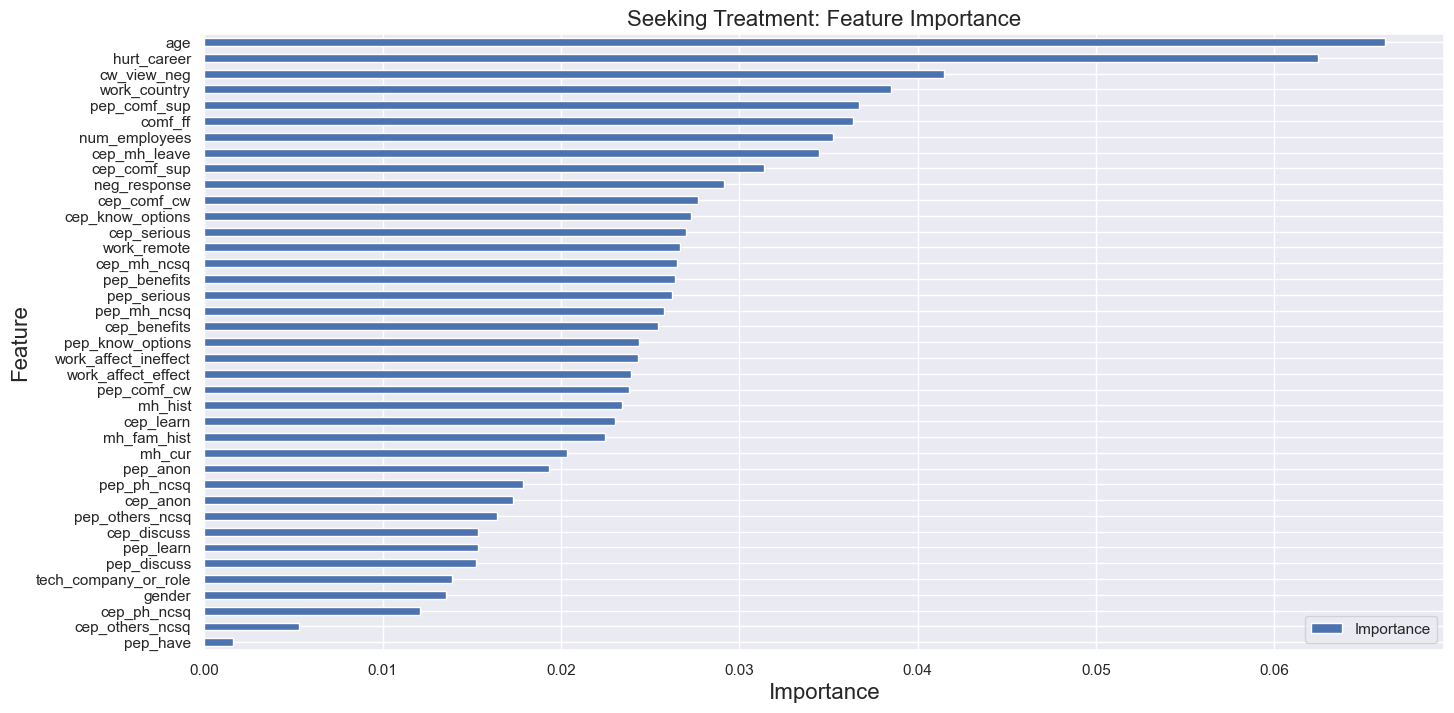

In [90]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y3_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Seeking Treatment: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

* Age is the most important predictor (again). The older one is, the more likely one will have sought treatment.
* The sentiment that being identified as having MHD as detrimental to one's career is the next most mportant predictor.
* Intuitively, the more one feels that being identified with MHD will hurt one's career, the more likely one would have sought treatment for it.

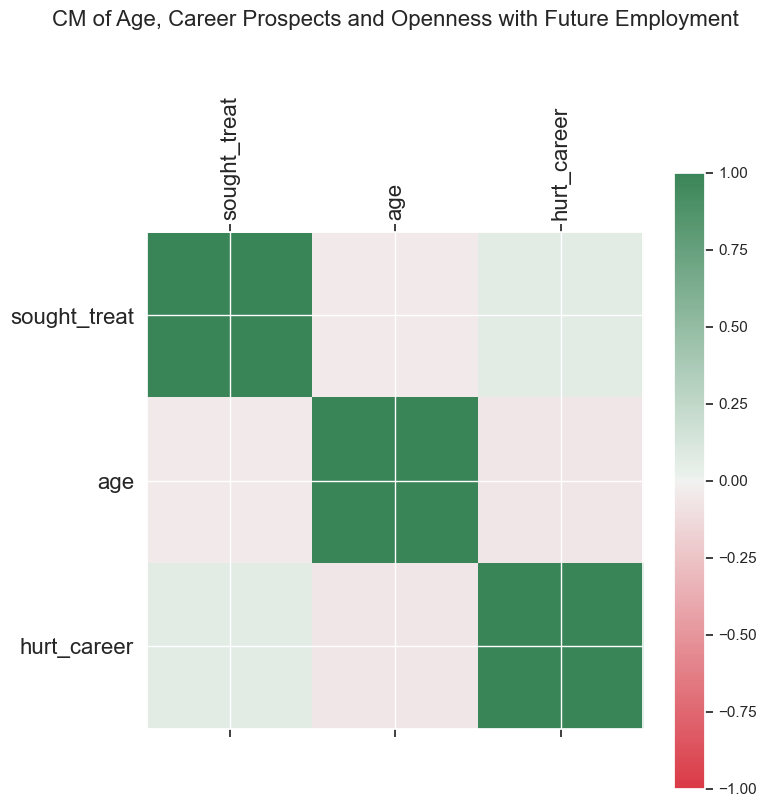

In [91]:
# To study the links between openness with future employer, age and career prospect
tmp = cdf10[36:37] + cdf10[39:40] + cdf10[28:29]
corr = df10_nan[tmp].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = tmp
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("CM of Age, Career Prospects and Openness with Future Employment",fontsize=fs,y=1.4)

plt.show()

In [92]:
# Save the trained model to a file
joblib.dump(clf3, 'treatment_rf.pkl')

['treatment_rf.pkl']

In [93]:
import joblib
clf = joblib.load('openness_rf.pkl') 
clf2 = joblib.load('diag_pro_rf.pkl')
clf3 = joblib.load('treatment_rf.pkl')

# Initialize an empty dictionary for responses_data
responses_data = {'num_employees': 1001.0,
 'tech_company_or_role': 0.0,
 'comf_ff': 4.0,
 'mh_fam_hist': 1.0,
 'mh_hist': 1.0,
 'mh_cur': 1.0,
 'age': 37.0,
 'gender': 1.0,
 'work_country': 1.0,
 'work_remote': 2.0,
 'cep_benefits': 2.0,
 'cep_know_options': 3.0,
 'cep_discuss': 3.0,
 'cep_learn': 3.0,
 'cep_anon': 2.0,
 'cep_mh_leave': 4.0,
 'cep_mh_ncsq': 2.0,
 'cep_ph_ncsq': 2.0,
 'cep_comf_cw': 3.0,
 'cep_comf_sup': 3.0,
 'cep_serious': 3.0,
 'cep_others_ncsq': 2.0,
 'pep_have': 1.0,
 'pep_benefits': 2.0,
 'pep_know_options': 2.0,
 'pep_discuss': 4.0,
 'pep_learn': 2.0,
 'pep_anon': 3.0,
 'pep_mh_ncsq': 1.0,
 'pep_ph_ncsq': 2.0,
 'pep_comf_cw': 3.0,
 'pep_comf_sup': 4.0,
 'pep_serious': 4.0,
 'pep_others_ncsq': 3.0,
 'hurt_career': 2.0,
 'cw_view_neg': 2.0,
 'neg_response': 3.0,
 'work_affect_effect': 2.0,
 'work_affect_ineffect': 1.0}


df = pd.DataFrame([responses_data])
data = df.values.tolist()

openness_pred = clf.predict(data)

df1 = df.copy()
df1.drop(columns = ['pep_learn', 'tech_company_or_role', 'cep_others_ncsq', 'pep_have'], inplace=True)
data1 = df1.values.tolist()
diag_pred = clf2.predict(data1)

treatment_pred = clf3.predict(data)

# Print or use the prediction
print("Predicted output:", openness_pred, diag_pred, treatment_pred)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted output: [3] [1] [1]


In [94]:
import sklearn
import joblib

print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

scikit-learn version: 1.2.1
joblib version: 1.1.1
